In [30]:
import pandas as pd
import re
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from typing import List
import re
import os

%matplotlib notebook

# Inserting calc results to my_dict

In [2]:
with open('multiple_W.txt') as f:
    my_dict = {}
    for line in f:
        if line.startswith('W='):
            key = re.match(r'[^E]+', line).group()
            my_dict[key] = []
        my_dict[key].append(line)

In [39]:
df_eq = file_to_pd_1('W1_0.1000005_10_correlations.txt')
df_uneq = file_to_pd_1('W1_0.1000005_11_correlations.txt')

In [48]:
df2_uneq = file_to_pd_old('W4_0.3000007_17_correlations.txt')
df2_eq = file_to_pd_old('W4_0.3000008_16_correlations.txt')
df2_eq_1 = file_to_pd_old('W4_1.0000008_16_correlations.txt')

# txt file to pandas dataframe

In [50]:
def file_to_pd(dct: dict, element: str)-> pd.DataFrame:
    lst = []
    lst2 = []
    my_iter = iter(dct[element][2:])
    for line in my_iter:
        if 'Потом айтензор' in line:
            break
        lst.append(dict(zip(['n1','n2','Re','Im'], list(map(float,re.findall(r'[\d\.e-]+', line))))))
    for line in my_iter:
        lst2.append(dict(zip(['n1','n2','Re','Im'], 
                             list(map(float,re.findall(r'[\d\.e-]+', line)))+[0])))

    df1 = pd.DataFrame(lst[1:])
    df2 = pd.DataFrame(lst2)
    df2 = df2[df2.n1 == df2.n2]
    df2.n1 += 1
    df2.n2 += 1
    df = pd.concat([df1, df2], axis = 0)
    df.sort_values(by = ['n1','n2'], inplace = True)
    df.reset_index(inplace = True, drop =True)
    
    return df


In [31]:
def file_to_pd_old(file_path:str)-> pd.DataFrame:
    lst = []
    lst2 = []
    with open(file_path) as f:
        for line in f:
            if 'Потом айтензор' in line:
                break
            lst.append(dict(zip(['n1','n2','Re','Im'], list(map(float,re.findall(r'[\d\.e-]+', line))))))
        for line in f:
            lst2.append(dict(zip(['n1','n2','Re','Im'], 
                                 list(map(float,re.findall(r'[\d\.e-]+', line)))+[0])))

    df1 = pd.DataFrame(lst[1:])
    df2 = pd.DataFrame(lst2)
    df2 = df2[df2.n1 == df2.n2]
    df2.n1 += 1
    df2.n2 += 1
    df = pd.concat([df1, df2], axis = 0)
    df.sort_values(by = ['n1','n2'], inplace = True)
    df.reset_index(inplace = True, drop =True)
    
    return df


In [30]:
def file_to_pd_1(file_path:str)-> pd.DataFrame:
    lst = []
    lst2 = []
    with open(file_path) as f:
        for line in f:
            if 'Потом айтензор' in line:
                break
            lst.append(dict(zip(['n1','n2','Re','Im'], list(map(float,re.findall(r'[\d\.e-]+', line))))))
        for line in f:
            lst2.append(dict(zip(['n1','n2','Re','Im'], 
                                 list(map(float,re.findall(r'[\d\.e-]+', line)))+[0])))

    df1 = pd.DataFrame(lst[1:])
    df2 = pd.DataFrame(lst2)
    df2 = df2[df2.n1 == df2.n2]
    df2.n1 += 1
    df2.n2 += 1
    df = pd.concat([df1, df2], axis = 0)
    df.sort_values(by = ['n1','n2'], inplace = True)
    df.reset_index(inplace = True, drop =True)
    
    return df

In [121]:
keys_list = list(my_dict.keys())
keys_list

['W=1L=40Nup =10 Ndown = 5 ',
 'W=1L=40Nup =16 Ndown = 4 ',
 'W=1L=40Nup =20 Ndown = 10 ',
 'W=1L=40Nup =16 Ndown = 8 ',
 'W=1L=40Nup =10 Ndown = 7 ',
 'W=1L=40Nup =20 Ndown = 11 ',
 'W=2L=40Nup =10 Ndown = 5 ',
 'W=2L=40Nup =10 Ndown = 7 ',
 'W=2L=40Nup =16 Ndown = 4 ',
 'W=3L=40Nup =10 Ndown = 5 ',
 'W=3L=40Nup =10 Ndown = 7 ',
 'W=2L=40Nup =16 Ndown = 8 ',
 'W=3L=40Nup =16 Ndown = 4 ',
 'W=4L=40Nup =10 Ndown = 5 ',
 'W=2L=40Nup =20 Ndown = 10 ',
 'W=4L=40Nup =10 Ndown = 7 ',
 'W=2L=40Nup =20 Ndown = 11 ',
 'W=3L=40Nup =16 Ndown = 8 ']

In [122]:
# my_dict[keys_list[0]]

In [129]:
df_W1_10_5 = file_to_pd(my_dict,keys_list[0])

In [130]:
df_W1_10_5.head()

,n1,n2,Re,Im
0,1.0,1.0,0.938896,0.0
1,1.0,3.0,0.083217,0.0
2,1.0,4.0,0.050223,0.0
3,1.0,5.0,0.014723,0.0
4,1.0,6.0,-0.009643,0.0


## Taking our parameter values

In [49]:
W, L = 4, 80
ctr = W * (L//2) - W//2

In [50]:
ctr

158

In [23]:
def get(df, n1, n2):
    return df[(df.n1 == n1) & (df.n2 == n2)].Re.values


In [51]:
cor1 = get_all_correlations(df2_eq, ctr)
# corr1_eq = [get(cor1, ctr, ctr + i_x*W) for i_x in range(L//2)]
# ctr+=1
# cor1 = get_all_correlations(df2_eq, ctr)
corr2_eq = [get(cor1, ctr, ctr + i_x*W) for i_x in range(L//2)]

# ctr= 119
# 79
cor2 = get_all_correlations(df2_uneq, ctr)
corr2_uneq = [get(cor2, ctr, ctr + i_x*W) for i_x in range(L//2)]


# ctr=119
# 79
cor2 = get_all_correlations(df2_eq_1, ctr)
corr2_eq2 = [get(cor2, ctr, ctr + i_x*W) for i_x in range(L//2)]
# cor = get_all_correlations(df_uneq, ctr)

# corr_uneq = [get(cor, ctr, ctr + i_x*W) for i_x in range(L//2)]

<IPython.core.display.Javascript object>


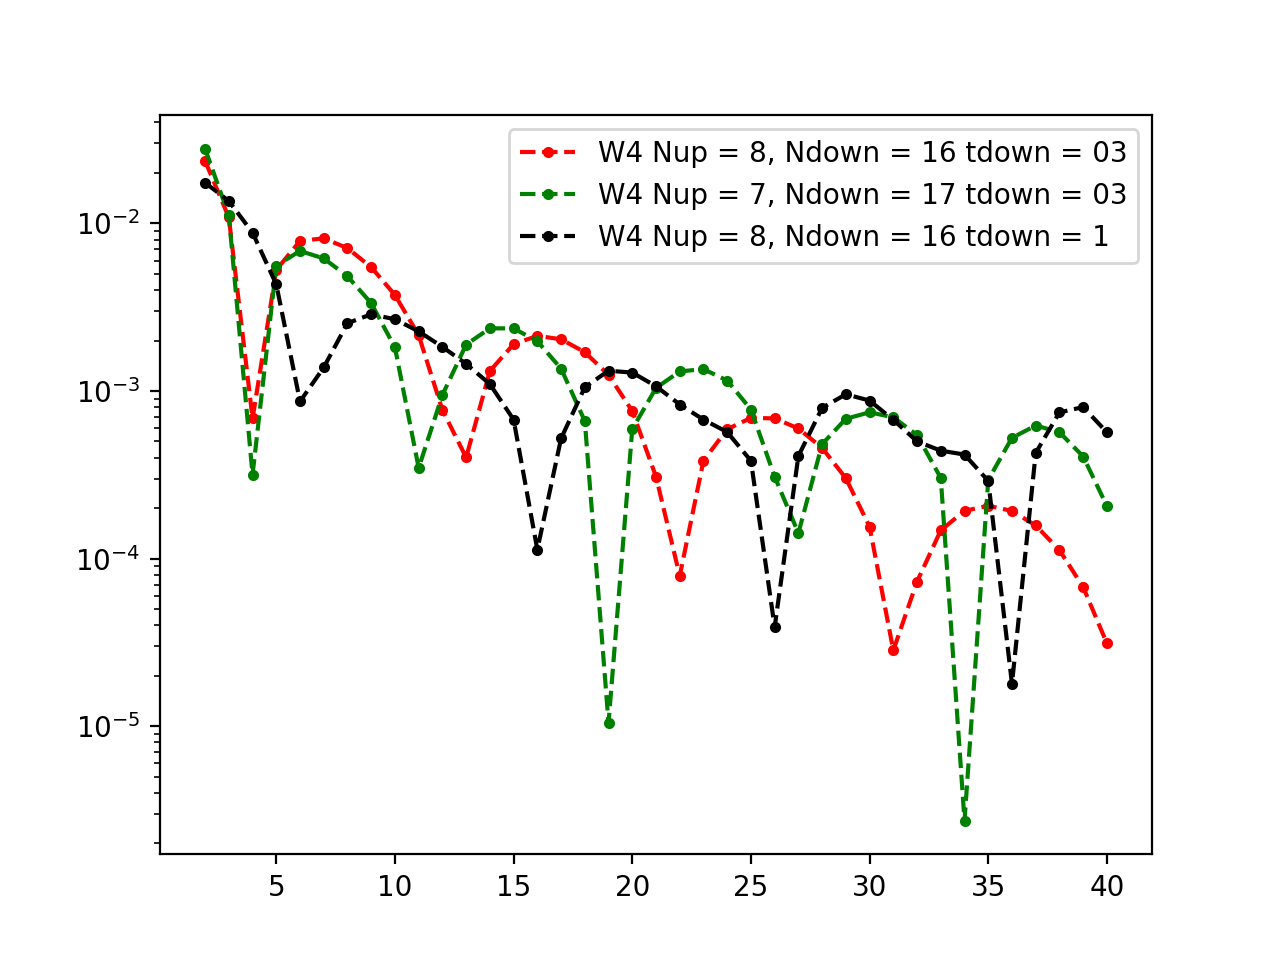

In [53]:
%matplotlib notebook
plt.semilogy([i+1 for i in range(len(corr2_eq))][1:],
         np.abs(np.array(corr2_eq).ravel())[1:], '.--', label ='W4 Nup = 8, Ndown = 16 tdown = 03', c = 'red')
plt.semilogy([i+1 for i in range(len(corr2_uneq))][1:],
         np.abs(np.array(corr2_uneq).ravel())[1:], '.--', label ='W4 Nup = 7, Ndown = 17 tdown = 03', c = 'green')
plt.semilogy([i+1 for i in range(len(corr2_eq2))][1:],
         np.abs(np.array(corr2_eq2).ravel())[1:], '.--', label ='W4 Nup = 8, Ndown = 16 tdown = 1', c = 'black')
# # plt.semilogy([i+1 for i in range(len(corr_uneq))],
#          np.abs(np.array(corr_uneq).ravel()), '.--', label ='Nup = 5, Ndown = 11 tdown = 01', c = 'blue')
             
plt.legend()

# W=5

In [62]:
df2_uneq = file_to_pd_old('W5_0.3000007_17_correlations.txt')
df2_eq = file_to_pd_old('W5_0.3000008_16_correlations.txt')
df2_eq_1 = file_to_pd_old('W5_1.0000008_16_correlations.txt')

In [63]:
W, L = 5, 80
ctr = W * (L//2) - W//2

In [64]:
cor1 = get_all_correlations(df2_eq, ctr)
# corr1_eq = [get(cor1, ctr, ctr + i_x*W) for i_x in range(L//2)]
# ctr+=1
# cor1 = get_all_correlations(df2_eq, ctr)
corr2_eq = [get(cor1, ctr, ctr + i_x*W) for i_x in range(L//2)]

# ctr= 119
# 79
cor2 = get_all_correlations(df2_uneq, ctr)
corr2_uneq = [get(cor2, ctr, ctr + i_x*W) for i_x in range(L//2)]


# ctr=119
# 79
cor2 = get_all_correlations(df2_eq_1, ctr)
corr2_eq2 = [get(cor2, ctr, ctr + i_x*W) for i_x in range(L//2)]

<IPython.core.display.Javascript object>


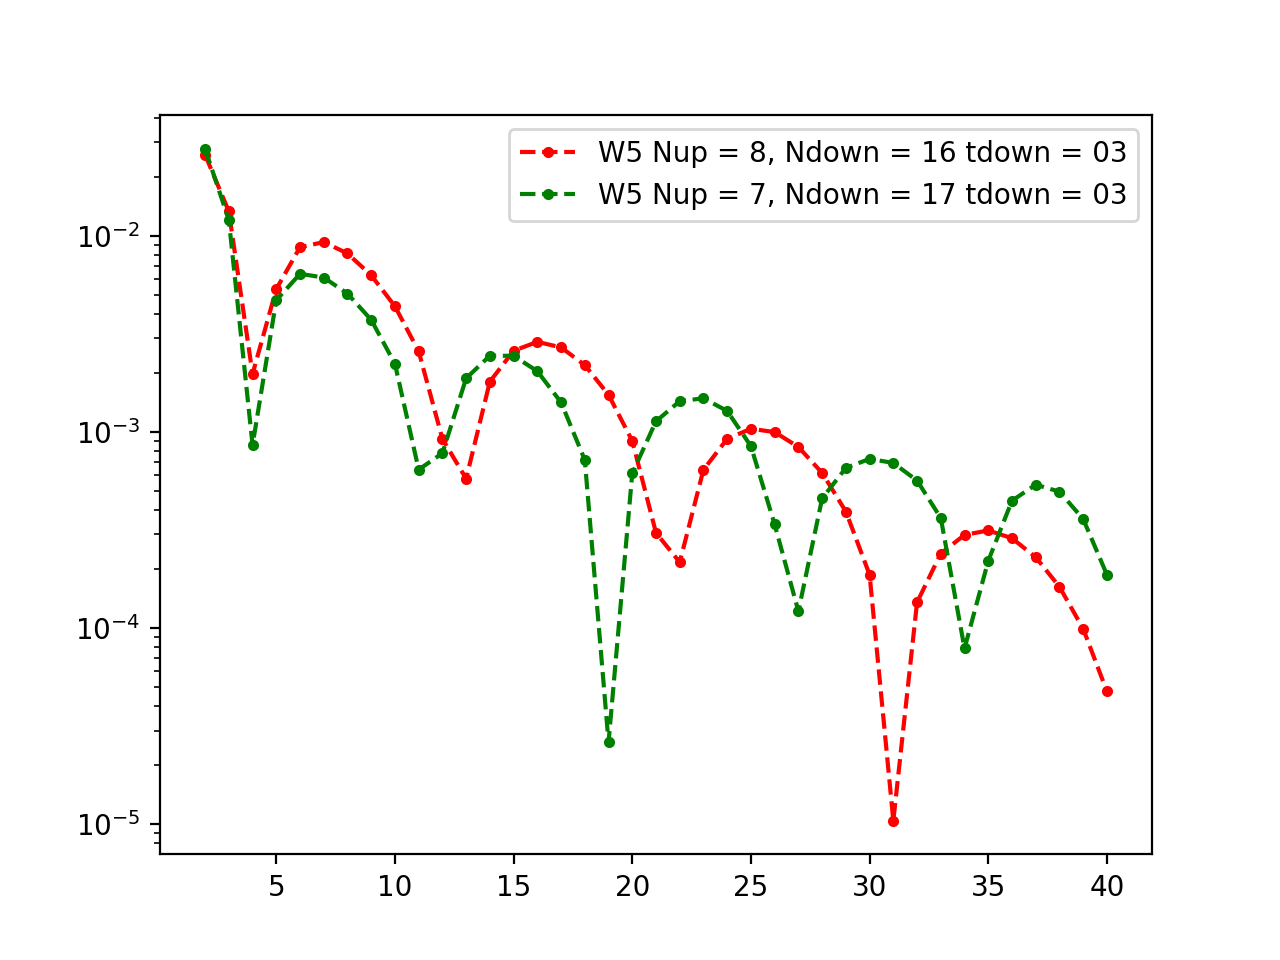

In [65]:
%matplotlib notebook
plt.semilogy([i+1 for i in range(len(corr2_eq))][1:],
         np.abs(np.array(corr2_eq).ravel())[1:], '.--', label ='W5 Nup = 8, Ndown = 16 tdown = 03', c = 'red')
plt.semilogy([i+1 for i in range(len(corr2_uneq))][1:],
         np.abs(np.array(corr2_uneq).ravel())[1:], '.--', label ='W5 Nup = 7, Ndown = 17 tdown = 03', c = 'green')
# plt.semilogy([i+1 for i in range(len(corr2_eq2))][1:],
#          np.abs(np.array(corr2_eq2).ravel())[1:], '.--', label ='W5 Nup = 8, Ndown = 16 tdown = 1', c = 'black')
# # plt.semilogy([i+1 for i in range(len(corr_uneq))],
#          np.abs(np.array(corr_uneq).ravel()), '.--', label ='Nup = 5, Ndown = 11 tdown = 01', c = 'blue')
             
plt.legend()

In [58]:
# df2_uneq = file_to_pd_old('W5_0.3000007_17_correlations.txt')
df2_eq = file_to_pd_old('W5_0.30000010_20_correlations.txt')
df2_eq_1 = file_to_pd_old('W5_1.00000010_20_correlations.txt')

In [59]:
cor1 = get_all_correlations(df2_eq, ctr)
# corr1_eq = [get(cor1, ctr, ctr + i_x*W) for i_x in range(L//2)]
# ctr+=1
# cor1 = get_all_correlations(df2_eq, ctr)
corr2_eq = [get(cor1, ctr, ctr + i_x*W) for i_x in range(L//2)]

cor2 = get_all_correlations(df2_eq_1, ctr)
corr2_eq2 = [get(cor2, ctr, ctr + i_x*W) for i_x in range(L//2)]

<IPython.core.display.Javascript object>


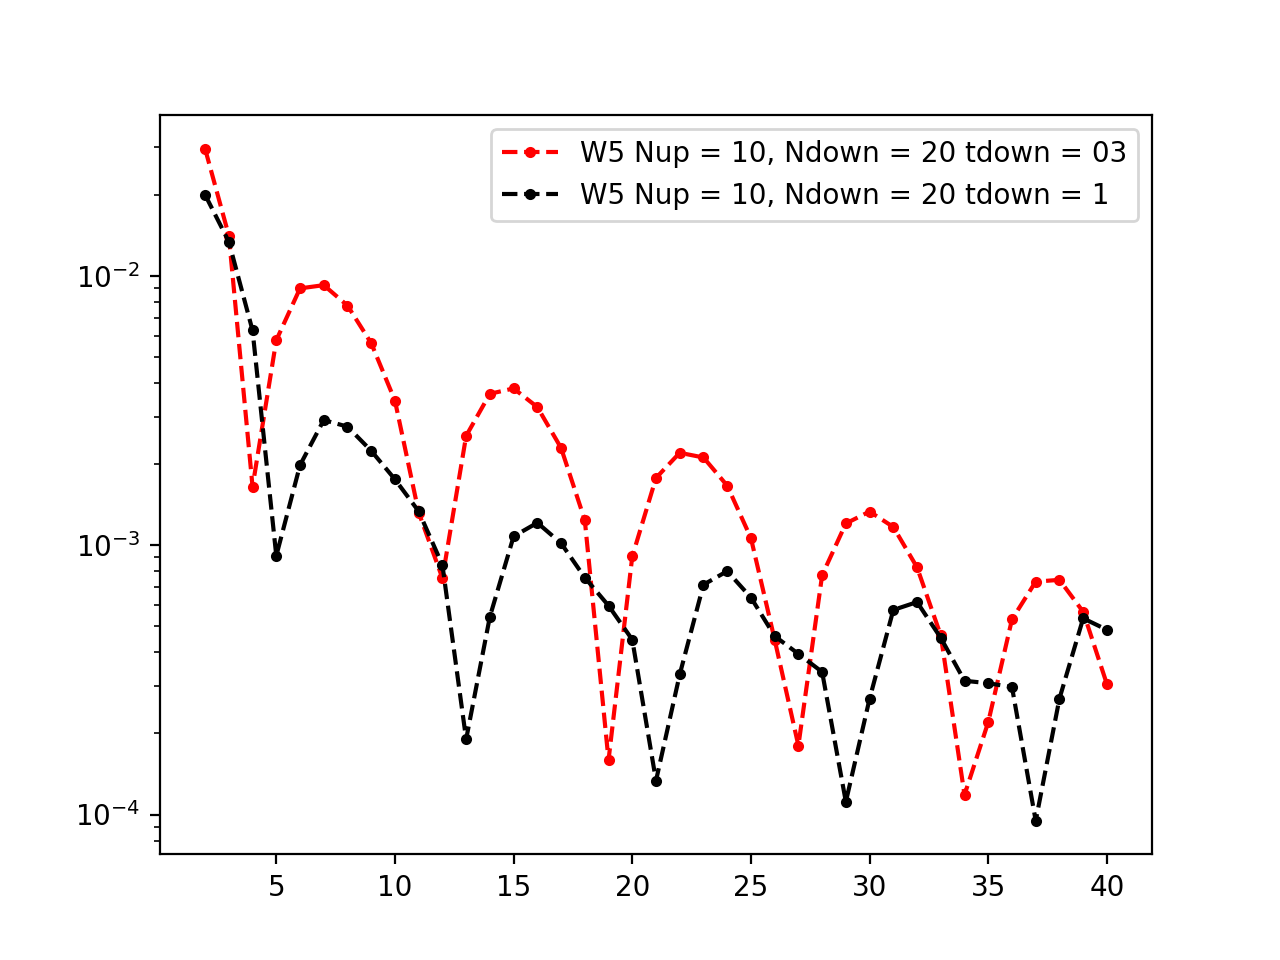

In [60]:
%matplotlib notebook
plt.semilogy([i+1 for i in range(len(corr2_eq))][1:],
         np.abs(np.array(corr2_eq).ravel())[1:], '.--', label ='W5 Nup = 10, Ndown = 20 tdown = 03', c = 'red')
plt.semilogy([i+1 for i in range(len(corr2_eq2))][1:],
         np.abs(np.array(corr2_eq2).ravel())[1:], '.--', label ='W5 Nup = 10, Ndown = 20 tdown = 1', c = 'black')
# # plt.semilogy([i+1 for i in range(len(corr_uneq))],
#          np.abs(np.array(corr_uneq).ravel()), '.--', label ='Nup = 5, Ndown = 11 tdown = 01', c = 'blue')
             
plt.legend()

# W=2

In [66]:
df2_uneq = file_to_pd_old('W2_0.30000012_20_correlations.txt')
df2_eq = file_to_pd_old('W2_0.30000010_20_correlations.txt')
df2_eq_1 = file_to_pd_old('W2_1.00000010_20_correlations.txt')

In [67]:
W, L = 2, 80
ctr = W * (L//2) - W//2

In [68]:
cor1 = get_all_correlations(df2_eq, ctr)
corr2_eq = [get(cor1, ctr, ctr + i_x*W) for i_x in range(L//2)]


cor2 = get_all_correlations(df2_uneq, ctr)
corr2_uneq = [get(cor2, ctr, ctr + i_x*W) for i_x in range(L//2)]


cor2 = get_all_correlations(df2_eq_1, ctr)
corr2_eq2 = [get(cor2, ctr, ctr + i_x*W) for i_x in range(L//2)]

<IPython.core.display.Javascript object>


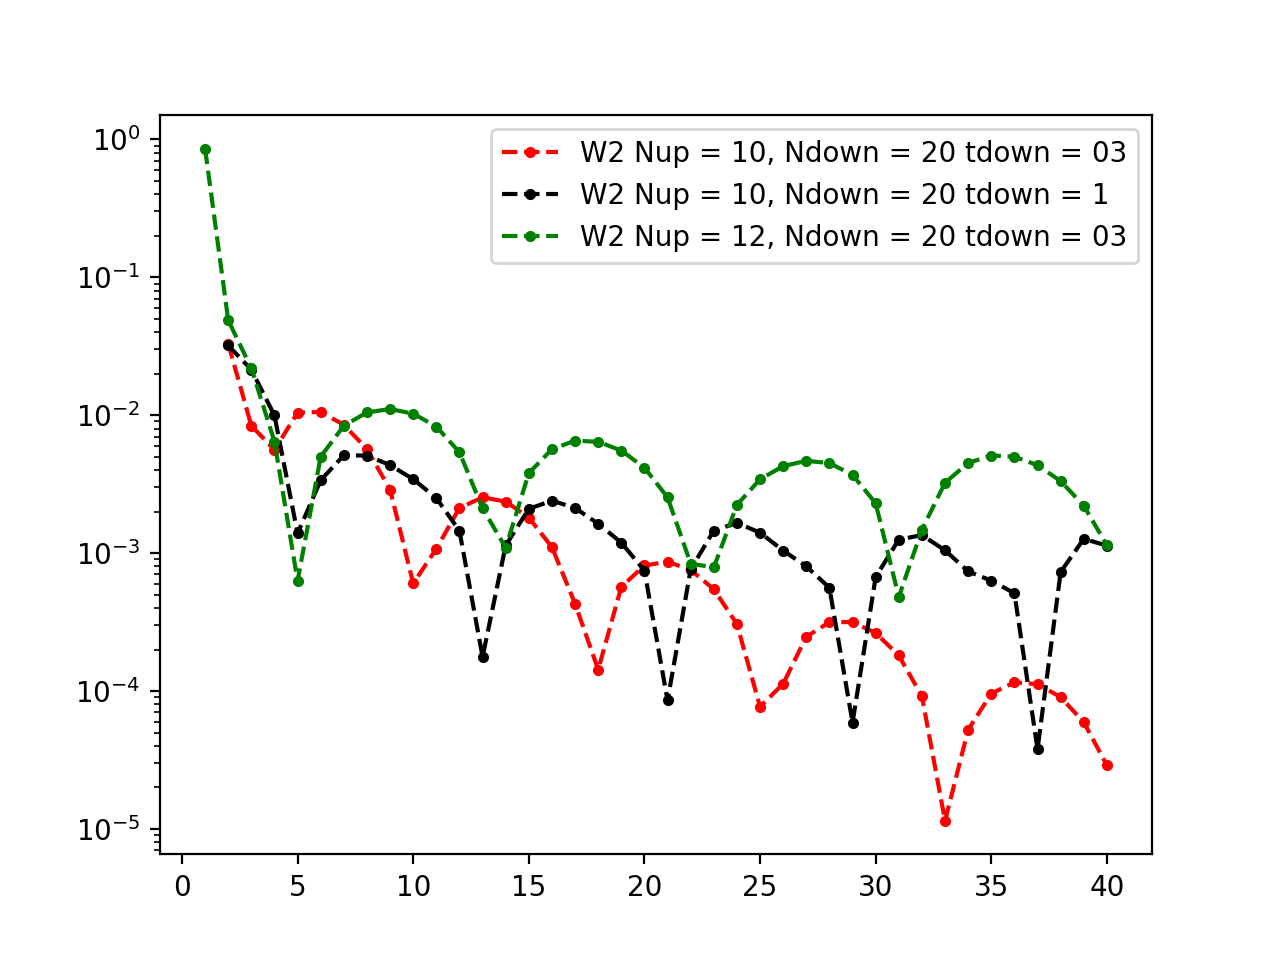

In [70]:
%matplotlib notebook
plt.semilogy([i+1 for i in range(len(corr2_eq))][1:],
         np.abs(np.array(corr2_eq).ravel())[1:], '.--', label ='W2 Nup = 10, Ndown = 20 tdown = 03', c = 'red')
plt.semilogy([i+1 for i in range(len(corr2_eq2))][1:],
         np.abs(np.array(corr2_eq2).ravel())[1:], '.--', label ='W2 Nup = 10, Ndown = 20 tdown = 1', c = 'black')
plt.semilogy([i+1 for i in range(len(corr2_uneq))],
         np.abs(np.array(corr2_uneq).ravel()), '.--', label ='W2 Nup = 12, Ndown = 20 tdown = 03', c = 'green')
             
plt.legend()

In [25]:
cor1 = get_all_correlations(df2_eq, ctr)
# corr1_eq = [get(cor1, ctr, ctr + i_x*W) for i_x in range(L//2)]
# ctr+=1
# cor1 = get_all_correlations(df2_eq, ctr)
corr2_eq = [get(cor1, ctr, ctr + i_x*W) for i_x in range(L//2)]

ctr= 119
# 79
cor2 = get_all_correlations(df2_uneq, ctr)
corr2_uneq = [get(cor2, ctr, ctr + i_x*W) for i_x in range(L//2)]


ctr=119
# 79
cor2 = get_all_correlations(df2_eq_1, ctr)
corr2_eq2 = [get(cor2, ctr, ctr + i_x*W) for i_x in range(L//2)]
# cor = get_all_correlations(df_uneq, ctr)

# corr_uneq = [get(cor, ctr, ctr + i_x*W) for i_x in range(L//2)]

<IPython.core.display.Javascript object>


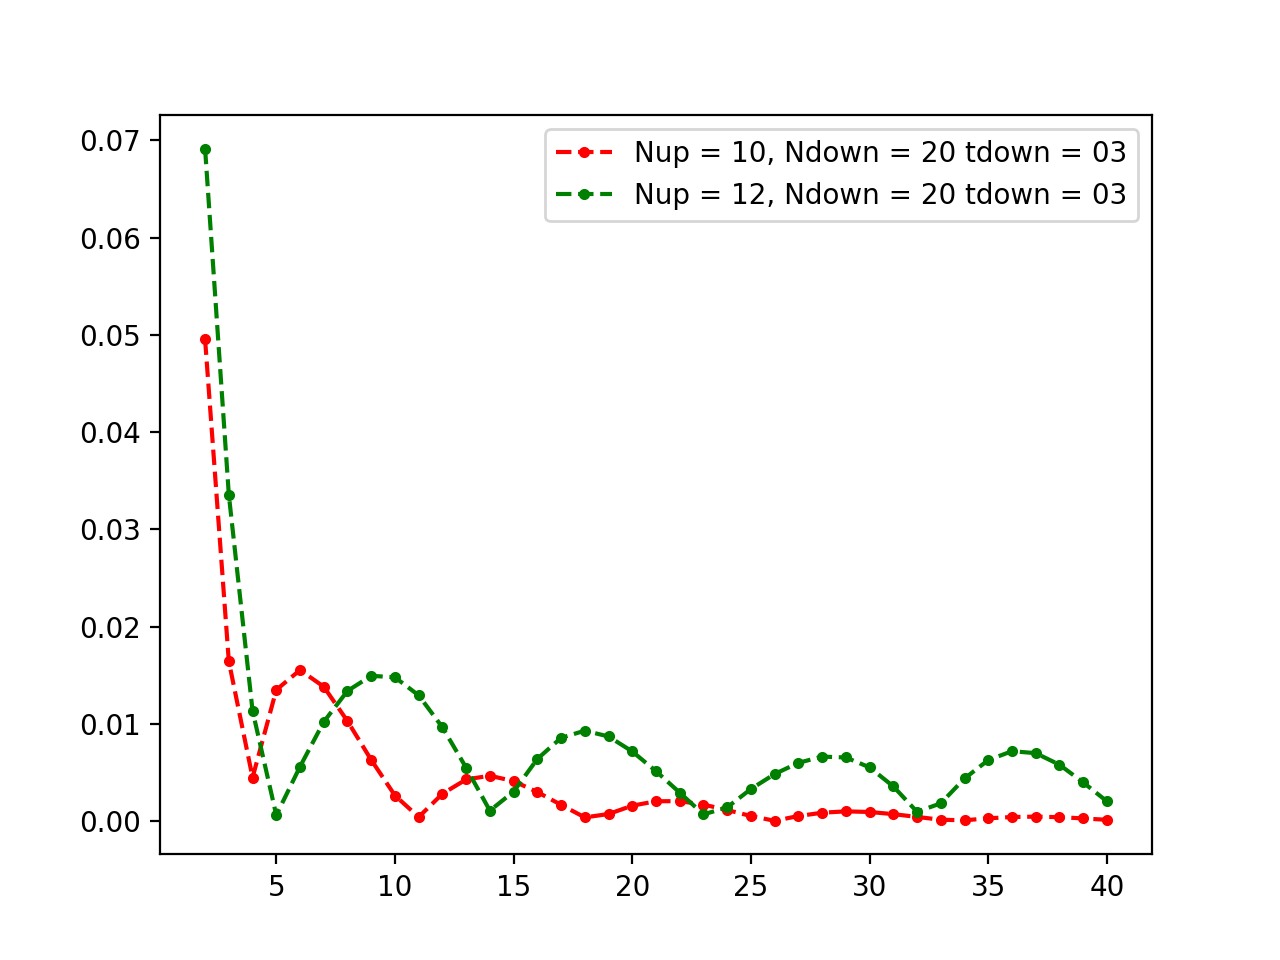

In [27]:
%matplotlib notebook
plt.plot([i+1 for i in range(len(corr2_eq))][1:],
         np.abs(np.array(corr2_eq).ravel())[1:], '.--', label ='Nup = 10, Ndown = 20 tdown = 03', c = 'red')
plt.plot([i+1 for i in range(len(corr2_uneq))][1:],
         np.abs(np.array(corr2_uneq).ravel())[1:], '.--', label ='Nup = 12, Ndown = 20 tdown = 03', c = 'green')
# plt.plot([i+1 for i in range(len(corr2_eq2))][1:],
#          np.abs(np.array(corr2_eq2).ravel())[1:], '.--', label ='Nup = 10, Ndown = 20 tdown = 1', c = 'black')
# # plt.semilogy([i+1 for i in range(len(corr_uneq))],
#          np.abs(np.array(corr_uneq).ravel()), '.--', label ='Nup = 5, Ndown = 11 tdown = 01', c = 'blue')
             
plt.legend()

<IPython.core.display.Javascript object>


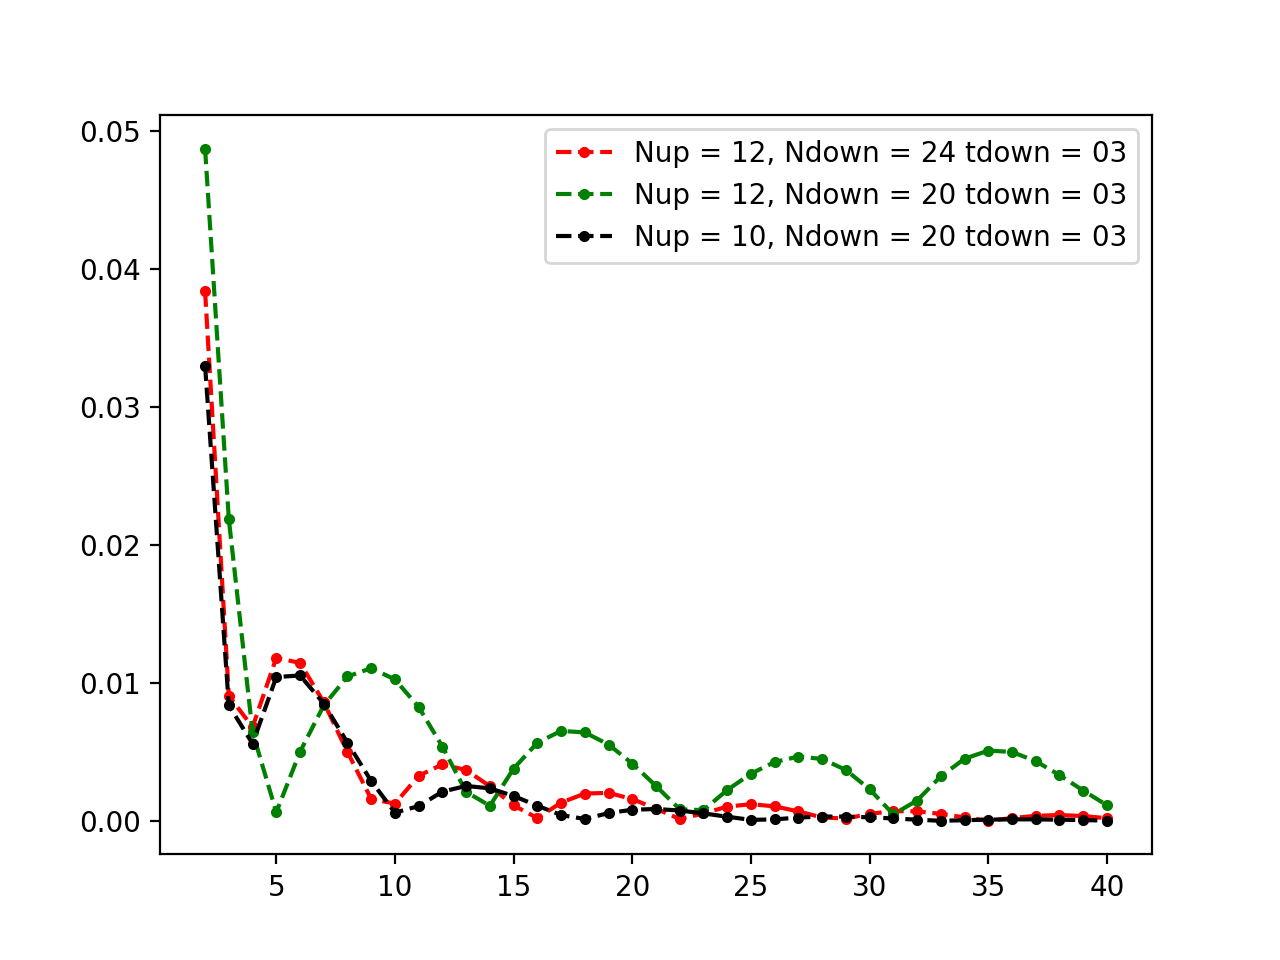

In [68]:
%matplotlib notebook
plt.plot([i+1 for i in range(len(corr1_eq))][1:],
         np.abs(np.array(corr1_eq).ravel())[1:], '.--', label ='Nup = 12, Ndown = 24 tdown = 03', c = 'red')
plt.plot([i+1 for i in range(len(corr2_uneq))][1:],
         np.abs(np.array(corr2_uneq).ravel())[1:], '.--', label ='Nup = 12, Ndown = 20 tdown = 03', c = 'green')
plt.plot([i+1 for i in range(len(corr2_eq2))][1:],
         np.abs(np.array(corr2_eq2).ravel())[1:], '.--', label ='Nup = 10, Ndown = 20 tdown = 03', c = 'black')
# plt.semilogy([i+1 for i in range(len(corr_uneq))],
#          np.abs(np.array(corr_uneq).ravel()), '.--', label ='Nup = 5, Ndown = 11 tdown = 01', c = 'blue')
             
plt.legend()

In [29]:
6290/60/60

1.7472222222222222

## In our program we have computed correlations for j>=i because correlation function is symmetric with respect to j <-> i

The function below gets all correlation values

In [35]:
# get all corr values
def get_all_correlations(data, site_num):
    d = data[(data.n2 == site_num)&(data.n2!=data.n1)].copy()
    d['add'] = d['n1']
    d['n1'] = d['n2']
    d['n2'] = d['add']
    d.drop('add', axis = 1, inplace = True)
    return pd.concat([data[data.n1 == site_num],
                      d], axis = 0).sort_values(by = 'n2')

In [10]:
cor = get_all_correlations(df, ctr)

In [35]:
# cor

If we compute correlations for the site with coordinates (3,20) in (W,L) plane


for W = 5 in iTensor sites are enumerated as:


    
    1   6	11	...
    2   7	12	...
    3   8	13	...
    4   9	14	...
    5   10   15  ...
    
so we have to compute differences between sites in x and y directions first

for Fourier-transformed values we'll need $\frac{1}{WL}\sum{\rho(l_1,l_2,w_1,w_2)}cos(k_x(l_1-l_2) + k_y(w_1 - w_2))$ see [Feiguin](https://arxiv.org/pdf/0809.1539.pdf) eq. (2)

I used cos here, because all correlation values are real

# Function for producing 2D-Fourier

position - site position in iTensor notation

In [5]:
def get_2d_fourier(data, W, L, position):
    df = data.copy()
    df['L_r'] = np.array([[i+1]*W for i in range(L)]).flatten() #right site index in L-direction
    df['W_r'] = np.array([list(range(1,W+1)) for _ in range(L)]).flatten() #right site index in W-direction
    
    df['L_l'] = df[df.n2==position].L_r.values[0] 
    df['W_l'] = df[df.n2==position].W_r.values[0]   
    
    df['delta_x'] = df['L_l'] - df['L_r']
    df['delta_y'] = df['W_l'] - df['W_r']
    
    ny = list(range(-W//2, W//2+1)) # ny values for Fourier transformation
    nx = list(range(-L//2+1, L//2+1)) # nx values for Fourier transformation
    
    s = {(n_kx, n_ky) :0 
         for n_kx in nx 
         for n_ky in ny}
    
    for n_kx, n_ky in s:
#         dd = cor.copy()
        kx = 2*np.pi * n_kx / L
        ky = 2*np.pi * n_ky / W

        df['phase'] = kx * df['delta_x'] + ky * df['delta_y']
        df['cos'] = np.cos(df['phase'])
        df['product'] = df['cos']*df['Re']*(1/(L*W))
        s[(n_kx, n_ky)] = df['product'].sum()
        
    return s

In [193]:
# with open('multiple_W.txt') as f:
#     my_dict = {}
#     for line in f:
#         if line.startswith('W='):
#             print(line)

In [164]:
# my_dict[keys_list[8]]

In [166]:
df_W1_10_5 = file_to_pd(my_dict,keys_list[0])
df_W1_16_4 = file_to_pd(my_dict,keys_list[1])
df_W1_20_10 = file_to_pd(my_dict,keys_list[2])
df_W1_16_8 = file_to_pd(my_dict,keys_list[3])
df_W1_10_7 = file_to_pd(my_dict,keys_list[4])
df_W1_20_11 = file_to_pd(my_dict,keys_list[5])
df_W2_10_5 = file_to_pd(my_dict,keys_list[6])
df_W2_10_7 = file_to_pd(my_dict,keys_list[7])
df_W2_16_4 = file_to_pd(my_dict,keys_list[8])
df_W3_10_5 = file_to_pd(my_dict,keys_list[9])
df_W3_10_7 = file_to_pd(my_dict,keys_list[10])
df_W2_16_8 = file_to_pd(my_dict,keys_list[11])
# df_W3_16_4 = file_to_pd(my_dict,keys_list[12])
df_W4_10_5 = file_to_pd(my_dict,keys_list[13])
df_W2_20_10 = file_to_pd(my_dict,keys_list[14])
# df_W4_10_7 = file_to_pd(my_dict,keys_list[15])
df_W1_20_11 = file_to_pd(my_dict,keys_list[16])
df_W3_16_8 = file_to_pd(my_dict,keys_list[17])

# Single chain Nup = 10, Ndown = 5

In [57]:
W, L = 1, 80
ctr = W * (L//2) - W//2

ctr

40

In [6]:
path = '/Users/i.pile/Documents/supercomp/trimers'


In [10]:
df1 = file_to_pd_old('/Users/i.pile/Documents/supercomp/trimers/W3_03_superconductive_L_8_16.txt')
df2 = file_to_pd_old('/Users/i.pile/Documents/supercomp/trimers/W3_03_superconductive_L_8_17.txt')
df3 = file_to_pd_old('/Users/i.pile/Documents/supercomp/trimers/W3_03_superconductive_L_8_16_fail.txt')

In [12]:
W, L = 3, 40
ctr = W * (L//2) - W//2
ctr

59

In [22]:
ctr = 59

In [23]:
# corr_W1_12_24 = [get(df1, ctr, ctr + i_x*W) for i_x in range(L//2+1)]
# corr_W1_1_12_24 = [get(df2, ctr, ctr + i_x*W) for i_x in range(L//2+1)]
# corr_W1_17_29 = [get(df3, ctr, ctr + i_x*W) for i_x in range(L//2+1)]

corr_W3_8_16_03 = [get(df1, ctr, ctr + i_x*W) for i_x in range(L//2+1)]
corr_W3_8_17_03 = [get(df2, ctr, ctr + i_x*W) for i_x in range(L//2+1)]
corr_W3_8_16_1 = [get(df3, ctr, ctr + i_x*W) for i_x in range(L//2+1)]

In [24]:
len(corr_W3_8_16_03), len([i+1 for i in range(len(corr_W3_8_16_03))])

(21, 21)

<IPython.core.display.Javascript object>


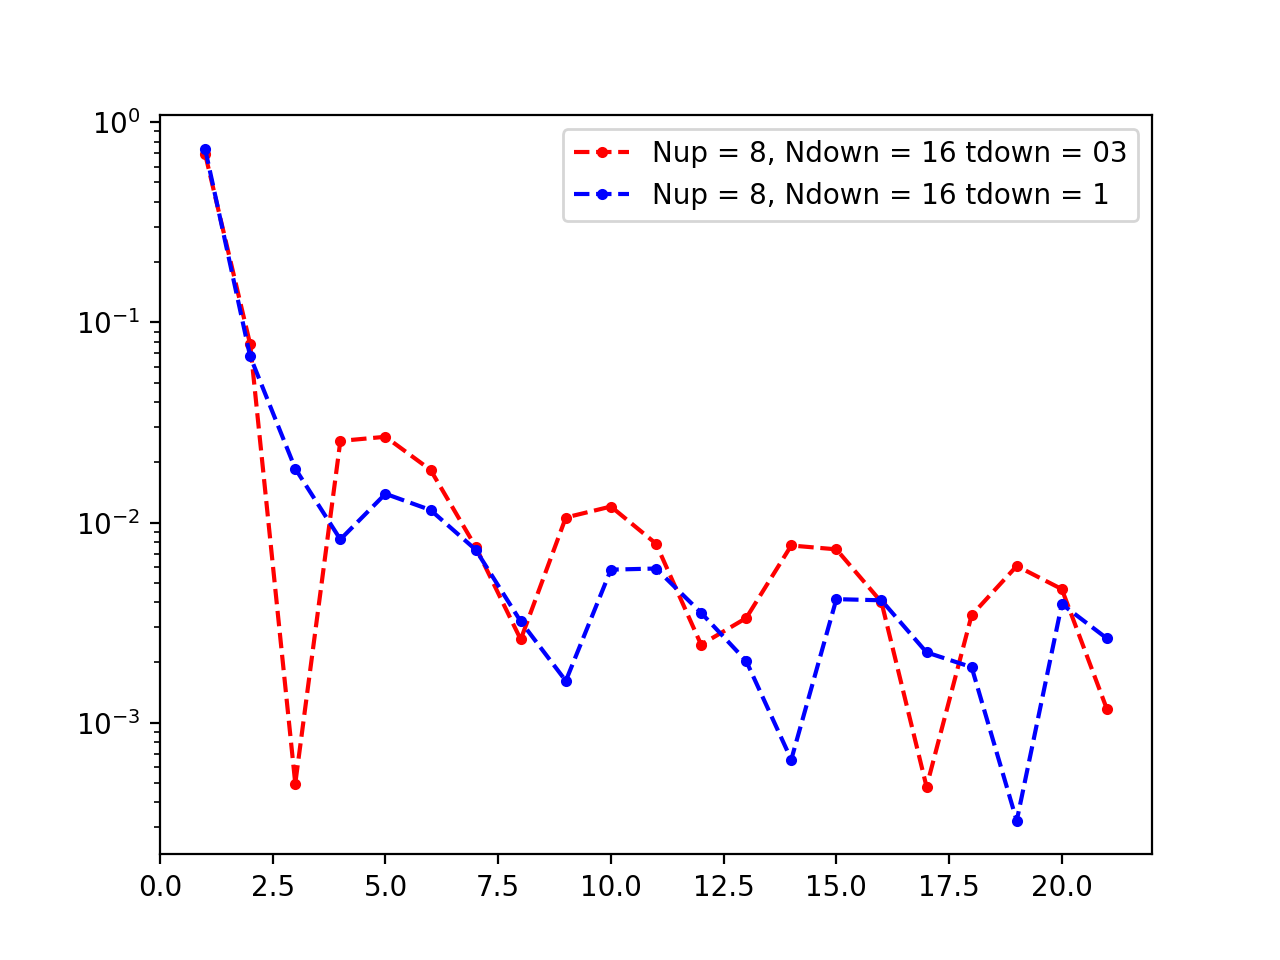

In [28]:
%matplotlib notebook
plt.semilogy([i+1 for i in range(len(corr_W3_8_16_03))],
         np.abs(np.array(corr_W3_8_16_03).ravel()), '.--', label ='Nup = 8, Ndown = 16 tdown = 03', c = 'red')
# plt.semilogy([i+1 for i in range(len(corr_W3_8_17_03))],
#          np.abs(np.array(corr_W3_8_17_03).ravel()), '.--', label ='Nup = 8, Ndown = 17 tdown = 03', c = 'black')
plt.semilogy([i+1 for i in range(len(corr_W3_8_16_1))],
         np.abs(np.array(corr_W3_8_16_1).ravel()), '.--', label ='Nup = 8, Ndown = 16 tdown = 1', c = 'blue')
             
plt.legend()

In [27]:
def fourier(df, x0, get=get):
    s = {n_kx:0 for n_kx in range(-L//2 + 1, L//2+1)}
    
    for n_kx in s:
        for i_x in range(L//2):
            kx = 2*np.pi * n_kx / L
            phase = kx * i_x
            term = get(df, x0, x0 + i_x*W) * np.cos(phase) / L
            s[n_kx] += term
    return s

In [25]:
# df_W1_10_5 = file_to_pd(my_dict,keys_list[0])
cor = get_all_correlations(df_W3_10_5, 59)

In [169]:
# len(cor)

120

In [43]:
74870/60/60

20.79722222222222

In [28]:
s = fourier(df1, 100)

In [29]:
s2 = fourier(df2, 100)

In [40]:
# list(s.items())

<IPython.core.display.Javascript object>


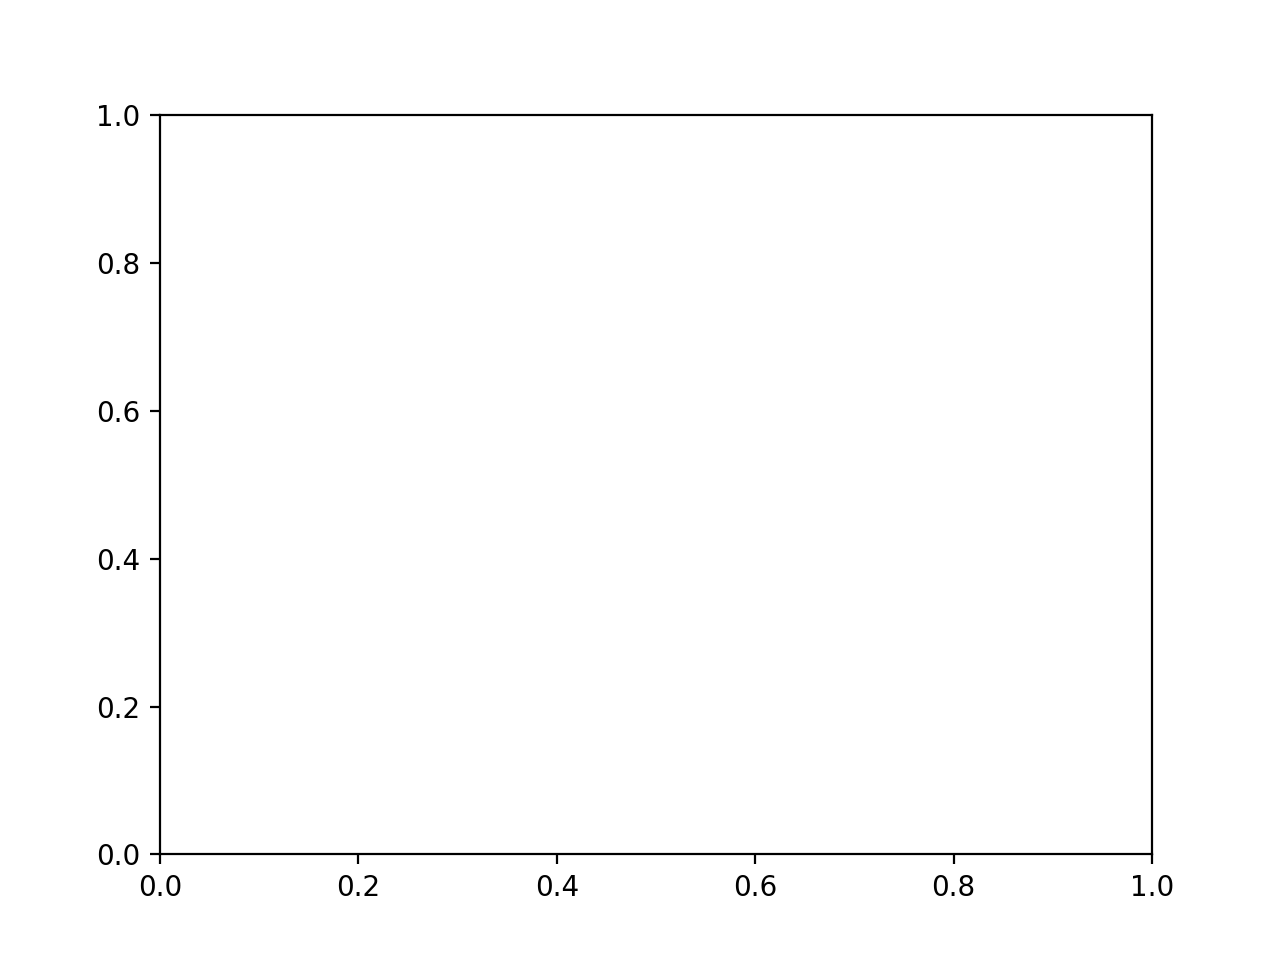

TypeError: float() argument must be a string or a number, not 'dict'

In [35]:
%matplotlib notebook
plt.plot(s, '.--', label ='Nup = 70, Ndown = 140')
# plt.plot(kx1[1::3],skxy[1::3], '.--', label ='Second leg')
# plt.plot(s2, '.--', label ='Nup = 70, Ndown = 120')
plt.legend()

In [200]:
kx1 = [2*np.pi * i[0] / L for i in s if (i[0] >= 0 and i[1] >= 0)]
ky1 = [2*np.pi * i[1] / W for i in s if (i[0] >= 0 and i[1] >= 0)]
skxy = [s[(i[0], i[1])] for i in s if (i[0] >= 0 and i[1] >= 0)]


<IPython.core.display.Javascript object>


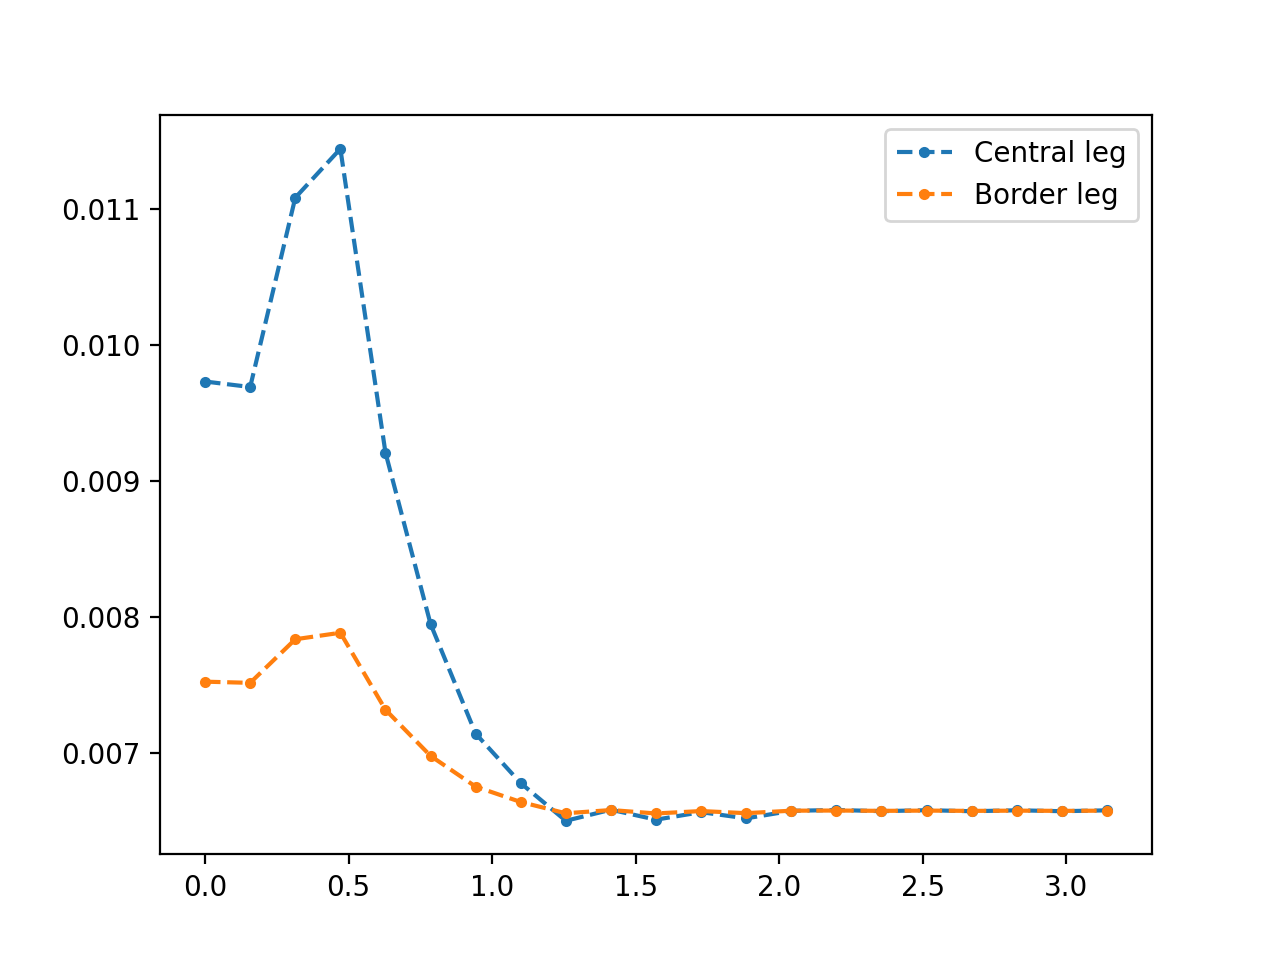

In [202]:
%matplotlib notebook
plt.plot(kx1[::2],skxy[::2], '.--', label ='Central leg')
# plt.plot(kx1[1::3],skxy[1::3], '.--', label ='Second leg')
plt.plot(kx1[1::2],skxy[1::2], '.--', label ='Border leg')
plt.legend()

In [22]:
%matplotlib notebook
plt.plot(kx1,skxy, '.--', label =r'Single chain $N_{\uparrow}$ = 10 $N_{\downarrow}$ = 5')
plt.legend()

NameError: name 'kx1' is not defined

In [150]:
corr_central = [get(cor, ctr, ctr + i_x*W) for i_x in range(L//2+1)]

<IPython.core.display.Javascript object>


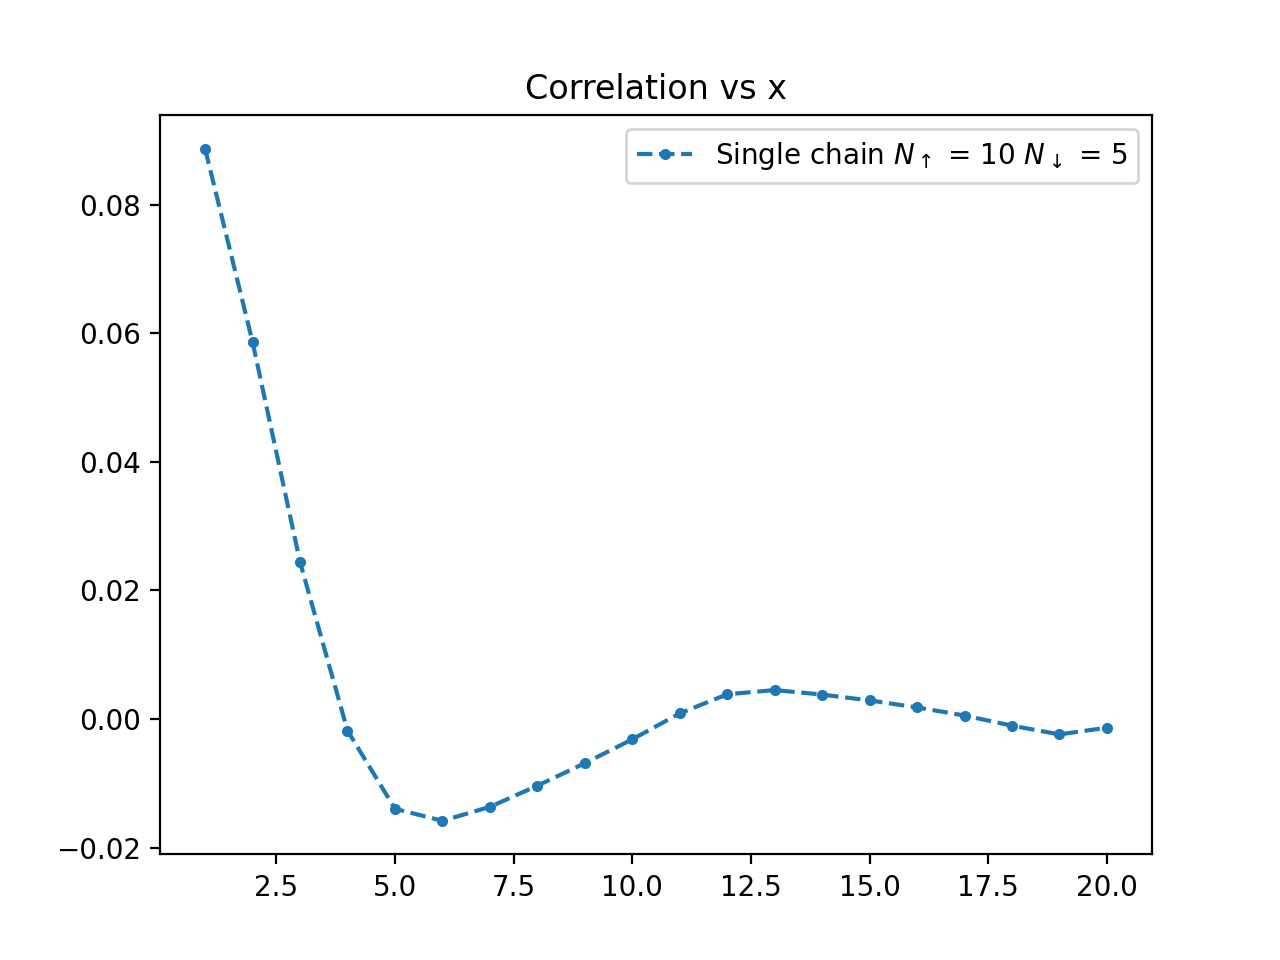

In [155]:
%matplotlib notebook

plt.plot([i+1 for i in range(len(corr_central)-1)],
         np.array(corr_central).ravel()[1:], '.--', 
         label = r'Single chain $N_{\uparrow}$ = 10 $N_{\downarrow}$ = 5')
# plt.xscale('log')

# plt.yscale('log')
plt.title('Correlation vs x')
plt.legend()

# Single chain Nup = 10, Ndown = 7

In [191]:
keys_list

['W=1L=40Nup =10 Ndown = 5 ',
 'W=1L=40Nup =16 Ndown = 4 ',
 'W=1L=40Nup =20 Ndown = 10 ',
 'W=1L=40Nup =16 Ndown = 8 ',
 'W=1L=40Nup =10 Ndown = 7 ',
 'W=1L=40Nup =20 Ndown = 11 ',
 'W=2L=40Nup =10 Ndown = 5 ',
 'W=2L=40Nup =10 Ndown = 7 ',
 'W=2L=40Nup =16 Ndown = 4 ',
 'W=3L=40Nup =10 Ndown = 5 ',
 'W=3L=40Nup =10 Ndown = 7 ',
 'W=2L=40Nup =16 Ndown = 8 ',
 'W=3L=40Nup =16 Ndown = 4 ',
 'W=4L=40Nup =10 Ndown = 5 ',
 'W=2L=40Nup =20 Ndown = 10 ',
 'W=4L=40Nup =10 Ndown = 7 ',
 'W=2L=40Nup =20 Ndown = 11 ',
 'W=3L=40Nup =16 Ndown = 8 ']

In [ ]:
df_W1_10_7 = file_to_pd(my_dict,keys_list[4])
cor = get_all_correlations(df_W1_10_5, 20)

# Normal graph 

<IPython.core.display.Javascript object>


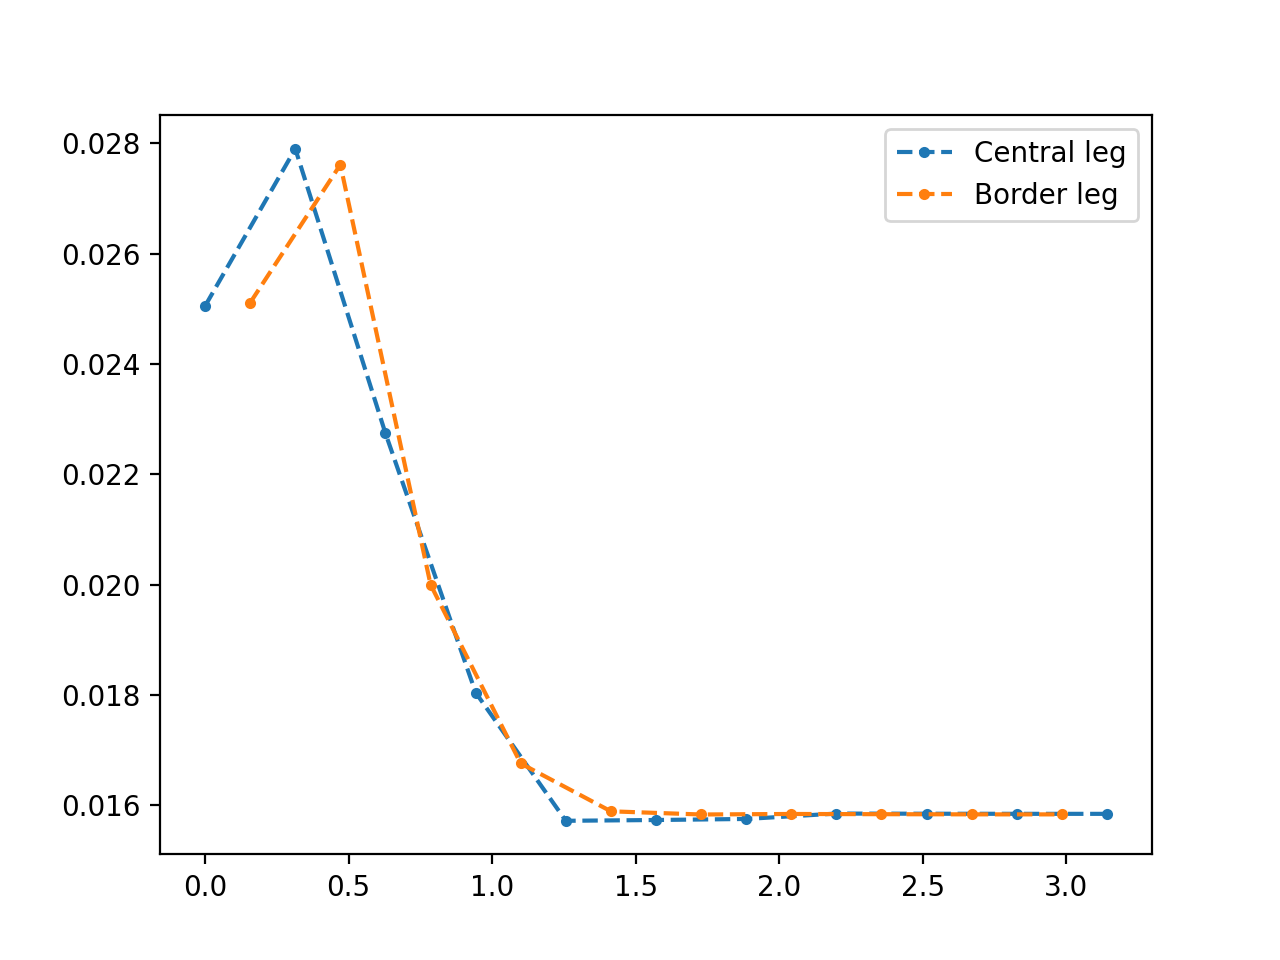

In [172]:
%matplotlib notebook
plt.plot(kx1[::2],skxy[::2], '.--', label ='Central leg')
# plt.plot(kx1[1::3],skxy[1::3], '.--', label ='Second leg')
plt.plot(kx1[1::2],skxy[1::2], '.--', label ='Border leg')
plt.legend()

# One also can look at raw correlation values (without fourier transformation)

In [49]:
filtered = cor[cor.n2>=cor.n1]
filtered

,n1,n2,Re,Im
14744,98.0,98.0,0.863299,0.0
14745,98.0,99.0,0.024576,0.0
14746,98.0,100.0,0.007688,0.0
14747,98.0,101.0,0.006018,0.0
14748,98.0,102.0,0.019252,0.0
...,...,...,...,...
14842,98.0,196.0,0.000026,0.0
14843,98.0,197.0,0.000073,0.0
14844,98.0,198.0,0.000094,0.0
14845,98.0,199.0,0.000073,0.0


In [50]:
ctr = 98 # our central site
corr_central = [get(cor, ctr, ctr + i_x*W) for i_x in range(L//2+1)]
corr_second = [get(cor, ctr, ctr+1 + i_x*W) for i_x in range(L//2+1)]
corr_border = [get(cor, ctr, ctr+2 + i_x*W) for i_x in range(L//2+1)]

We're throwing away correlation (taking [1:]) of a site with itself and with its neighbors along the W (because self-correlation is 1 order of magnitude higher than other correlations)

<IPython.core.display.Javascript object>


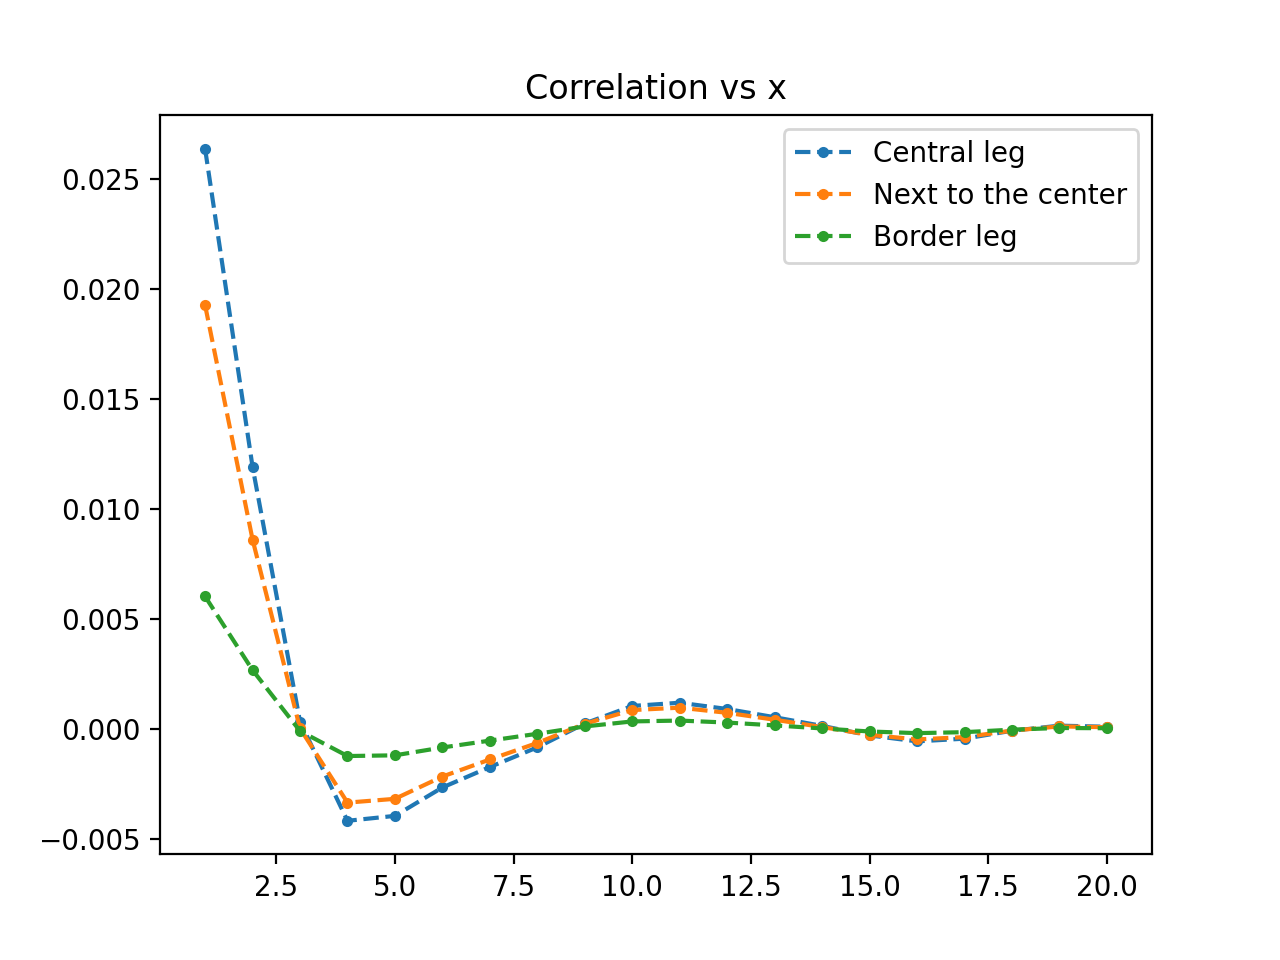

In [51]:
%matplotlib notebook

plt.plot([i+1 for i in range(len(corr_central)-1)],
         np.array(corr_central).ravel()[1:], '.--', label ='Central leg')
plt.plot([i+1 for i in range(len(corr_second)-1)],
         np.array(corr_second).ravel()[1:], '.--', label ='Next to the center')
plt.plot([i+1 for i in range(len(corr_border)-1)],
         np.array(corr_border).ravel()[1:], '.--', label ='Border leg')
# plt.xscale('log')

# # plt.yscale('log')
plt.title('Correlation vs x')
plt.legend()

# Ground state energies to calculate mu, h for correlations

In [90]:
# Nup =20 Ndown = 0 E = -64.1494785814035140 time: 681374 ms 681 sec W = 5 L = 40
# Nup =11 Ndown = 11 E = -100.9870773167060065 time: 76802862 ms 76802 sec W = 5 L = 40
# Nup =11 Ndown = 9 E = -89.9567734280141593 time: 173034069 ms 173034 sec W = 5 L = 40
# Nup =18 Ndown = 2 E = -71.1500456202175826 time: 259762148 ms 259762 sec W = 5 L = 40
# Nup =16 Ndown = 4 E = -77.5399842348290207 time: 271086499 ms 271086 sec W = 5 L = 40
# Nup =19 Ndown = 1 E = -67.7292983445369003 time: 284621115 ms 284621 sec W = 5 L = 40
# Nup =20 Ndown = 2 E = -76.7841779744041446 time: 308148136 ms 308148 sec W = 5 L = 40
# Nup =19 Ndown = 3 E = -80.2088098304044195 time: 358476411 ms 358476 sec W = 5 L = 40
# Nup =18 Ndown = 4 E = -83.4909610479946167 time: 366725272 ms 366725 sec W = 5 L = 40
# Nup =14 Ndown = 6 E = -82.9437056856404240 time: 379272510 ms 379272 sec W = 5 L = 40
# Nup =15 Ndown = 5 E = -80.3146895847640963 time: 94327665 ms 94327 sec W = 5L = 40
# Nup =16 Ndown = 6 E = -89.2978784708057560 time: 155718975 ms 155718 sec W = 5L = 40

In [190]:
76802/3600

21.33388888888889

### For Nup, Ndown = 15, 5 that reads

$\mu, h = {E(16,5\pm1) - E(15,5)\over 2}$

In [93]:
E15_5 = -80.3146895847640963
E16_6 = -89.2978784708057560
E16_4 = -77.5399842348290207


mu_15_5 = (E16_6 - E15_5)/2
h_15_5 = (E16_4 - E15_5)/2

print(r"mu_15_5 =", mu_15_5)
print(r"h_15_5 =", h_15_5)

mu_15_5 = -4.49159444302083
h_15_5 = 1.3873526749675378


# 10,10 

$\mu, h = {E(11,10\pm1) - E(10,10)\over 2}$

In [94]:
E10_10 = -91.9543851856964
E11_11 = -100.9870773167060065
E11_9 = -89.9567734280141593


mu_10_10 = (E11_11 - E10_10)/2
h_10_10 = (E11_9 - E10_10)/2

print(r"mu_10_10 =", mu_10_10)
print(r"h_10_10 =", h_10_10)

mu_10_10 = -4.5163460655048056
h_10_10 = 0.998805878841118


# 19, 1

$\mu, h = {E(20,1\pm1) - E(19,1)\over 2}$

In [95]:
E19_1 = -67.7292983445369003
E20_2 = -76.7841779744041446
E20_0 = -64.1494785814035140


mu_19_1 = (E20_2 - E19_1)/2
h_19_1 = (E20_0 - E19_1)/2

print(r"mu_19_1 =", mu_19_1)
print(r"h_19_1 =", h_19_1)

mu_19_1 = -4.527439814933622
h_19_1 = 1.7899098815666932


# Let's add the inset graph as in our overleaf-template explicitly

<IPython.core.display.Javascript object>


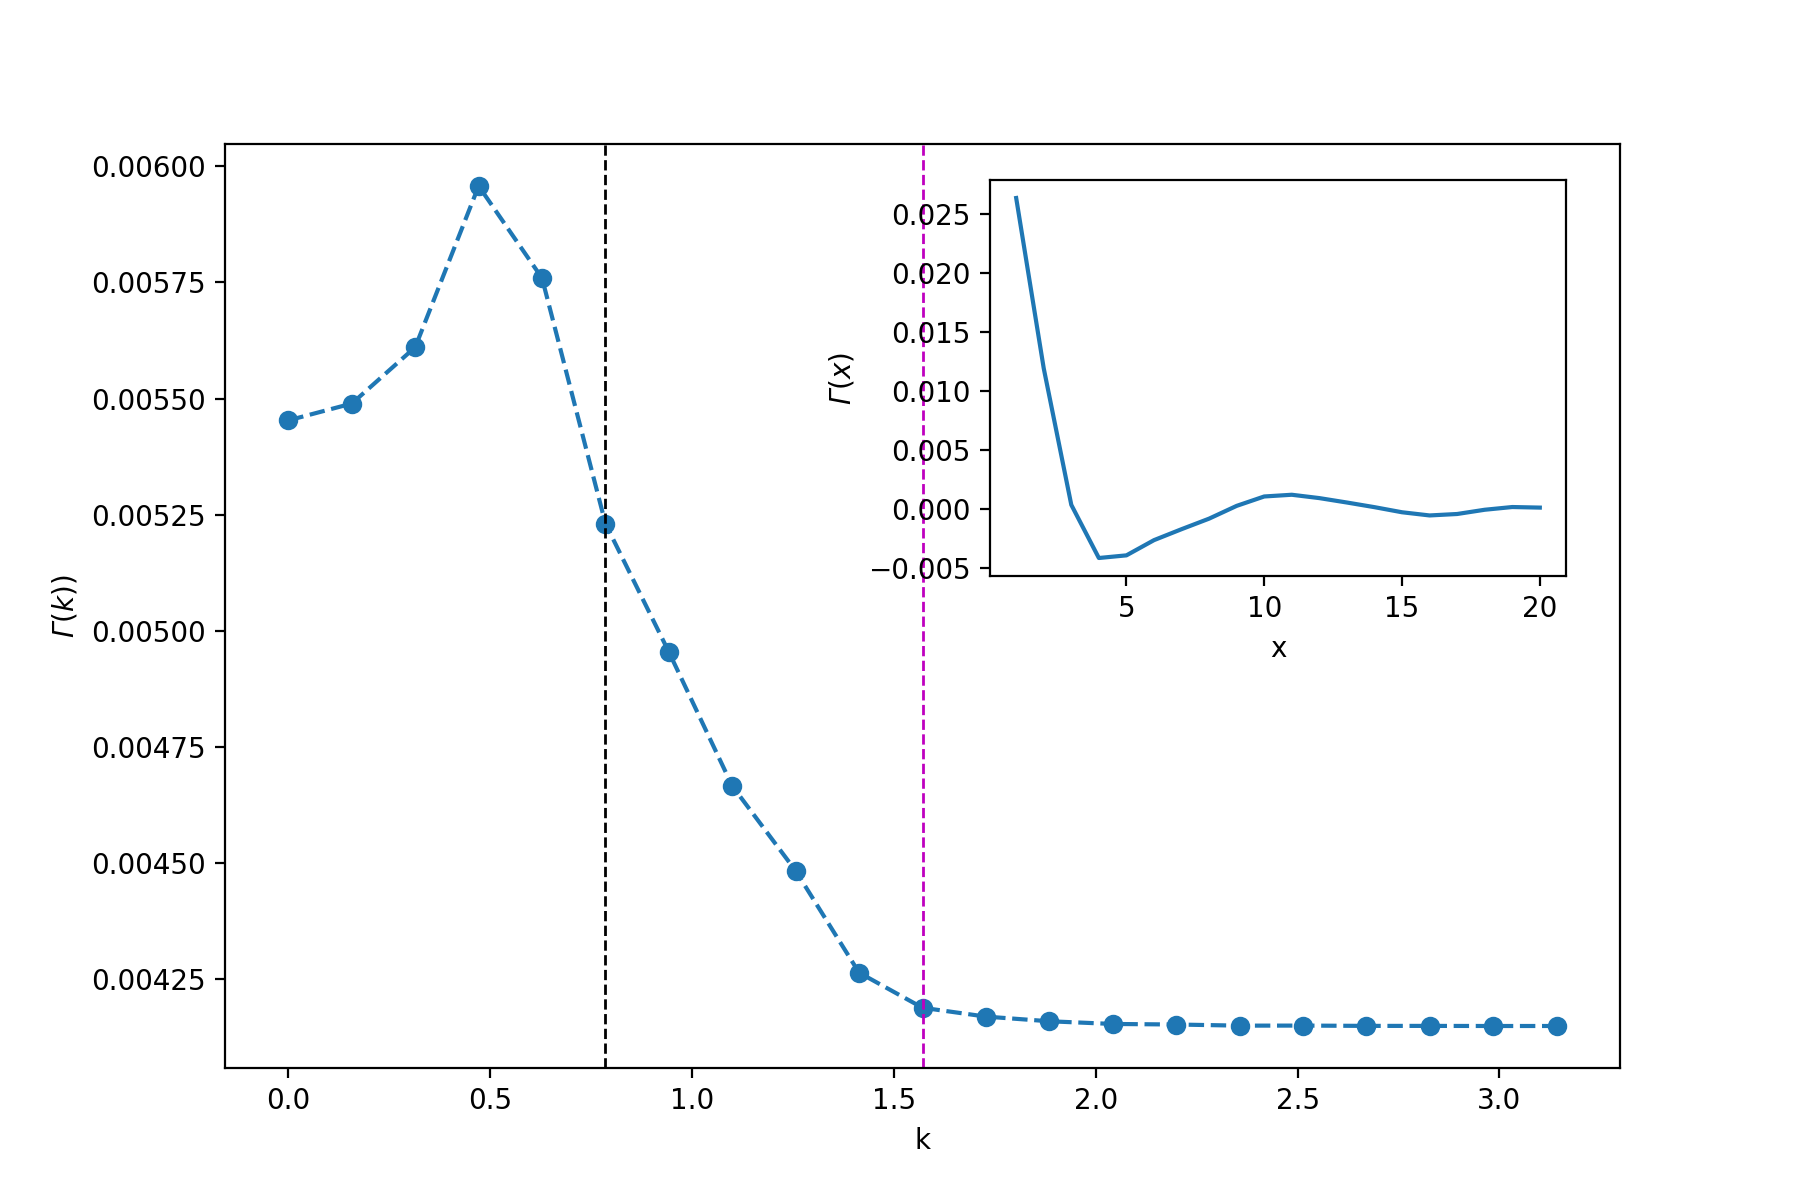

In [89]:
fig, ax1 = plt.subplots(figsize =(9,6))

Nup, Ndown = 15, 5

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.55, 0.52, 0.32, 0.33]
ax2 = fig.add_axes([left, bottom, width, height])

ax1.plot(kx1[::3],skxy[::3], 'o--')
ax1.set_ylabel(r'$Г(k)$')
ax1.set_xlabel('k')

ax1.axvline(np.pi * (Nup - Ndown)/L, ls='--', c='k', lw=1) #Nup - Ndn
ax1.axvline(np.pi * (Nup+Ndown)/L, ls='--', c='m', lw=1) #Nup + Ndn

ax2.plot([i+1 for i in range(len(corr_central)-1)],
         np.array(corr_central).ravel()[1:])
ax2.set_ylabel(r'$Г(x)$')
ax2.set_xlabel('x')

plt.show()

In [180]:
# def fourier(df, x0, get=get):
#     s = {n_kx:0 for n_kx in range(-L//2+1, L//2+1)} # 
    
#     for n_kx in s:
#         for i_x in range(L//2):
#             kx = 2*np.pi * n_kx / L
#             phase = kx * i_x
#             term = get(df, x0, x0 + i_x*W) * np.cos(phase) / L
#             s[n_kx] += term
#     return s

In [181]:
# def fourier_2d(df, x0, get=get):
#     s = {(n_kx, n_ky) :0 
#          for n_kx in range(-L//2+1, L//2+1) 
#          for n_ky in range(-W//2, W//2+1)}
    
#     for n_kx, n_ky in s:
#         for i_x in range(L//2):
#             for i_y in range(W//2+1): # Тут +1 чтобы было три элемента (для нечетных нужен +1)
#                 kx = 2*np.pi * n_kx / L
#                 ky = 2*np.pi * n_ky / W

#                 phase = kx * i_x + ky * i_y

#                 term = get(df, x0, x0 + i_x*W+ i_y) * np.cos(phase)/ (L*W)  # Тут сдвигаем на i_y т.к. счет вдоль Oy
#                 s[(n_kx, n_ky)] += term
#     return s

# Central leg W = 5, Nup = 15, Ndown = 5

<IPython.core.display.Javascript object>


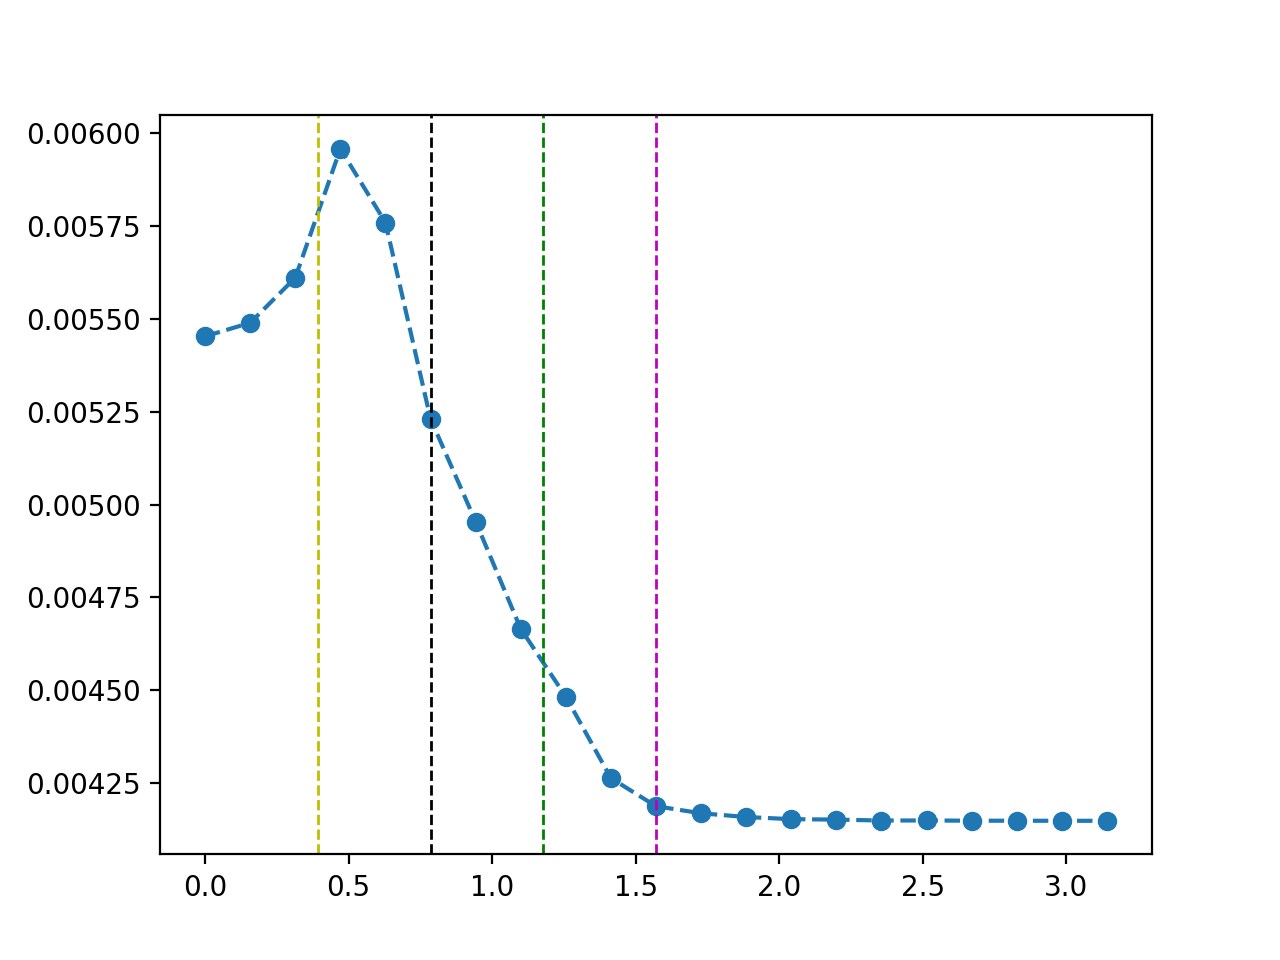

In [65]:
%matplotlib notebook

kx = kx1[::3]
skx = skxy[::3]

plt.plot(kx, skx, 'o--')
Nup, Ndown = 15, 5
plt.axvline(np.pi * (Nup)/L, ls='--', c='g', lw=1) #Nup
plt.axvline(np.pi * (Ndown)/L, ls='--', c='y', lw=1) #Ndn
plt.axvline(np.pi * (Nup - Ndown)/L, ls='--', c='k', lw=1) #Nup - Ndn
plt.axvline(np.pi * (Nup+Ndown)/L, ls='--', c='m', lw=1) #Nup + Ndn

# W5, Nup = 19, Ndown = 1, so called "polaron" line of the diagram

In [91]:
df19_1 = file_to_pd('W5_40_19_1_superconductive.txt')
W, L = 5, 40
ctr = W * (L//2) - W//2

In [92]:
ctr

98

## Let's draw the correlations

<IPython.core.display.Javascript object>


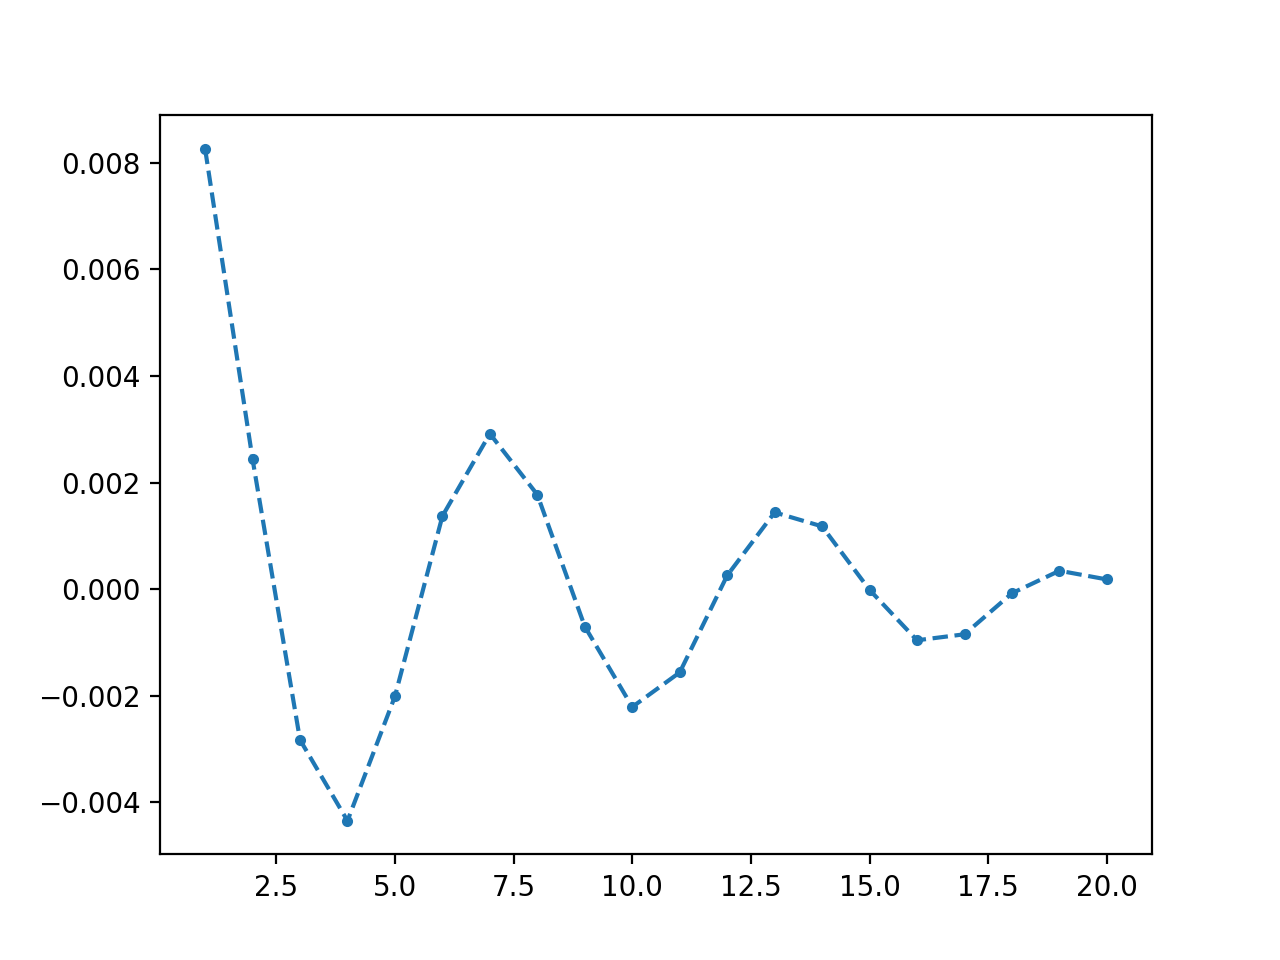

In [93]:
%matplotlib notebook
corr = [get(df, ctr, ctr + i_x*W) for i_x in range(L//2+1)]
plt.plot([i+1 for i in range(len(corr)-1)],
         np.array(corr).ravel()[1:], '.--')
# plt.xscale('log')
# plt.yscale('log')

In [94]:
cor = get_all_correlations(df, 98)
cor

,n1,n2,Re,Im
97,98.0,1.0,0.000031,0.0
296,98.0,2.0,0.000089,0.0
494,98.0,3.0,0.000112,0.0
691,98.0,4.0,0.000089,0.0
887,98.0,5.0,0.000031,0.0
...,...,...,...,...
14842,98.0,196.0,0.000050,0.0
14843,98.0,197.0,0.000144,0.0
14844,98.0,198.0,0.000182,0.0
14845,98.0,199.0,0.000144,0.0


In [95]:
cor = get_all_correlations(df19_1, 98)
fourier2d = get_2d_fourier(cor, 5, 40, 98)

kx1 = [2*np.pi * i[0] / L for i in fourier2d if (i[0] >= 0 and i[1] >= 0)]
ky1 = [2*np.pi * i[1] / W for i in fourier2d if (i[0] >= 0 and i[1] >= 0)]
skxy = [fourier2d[(i[0], i[1])] for i in fourier2d if (i[0] >= 0 and i[1] >= 0)]

<IPython.core.display.Javascript object>


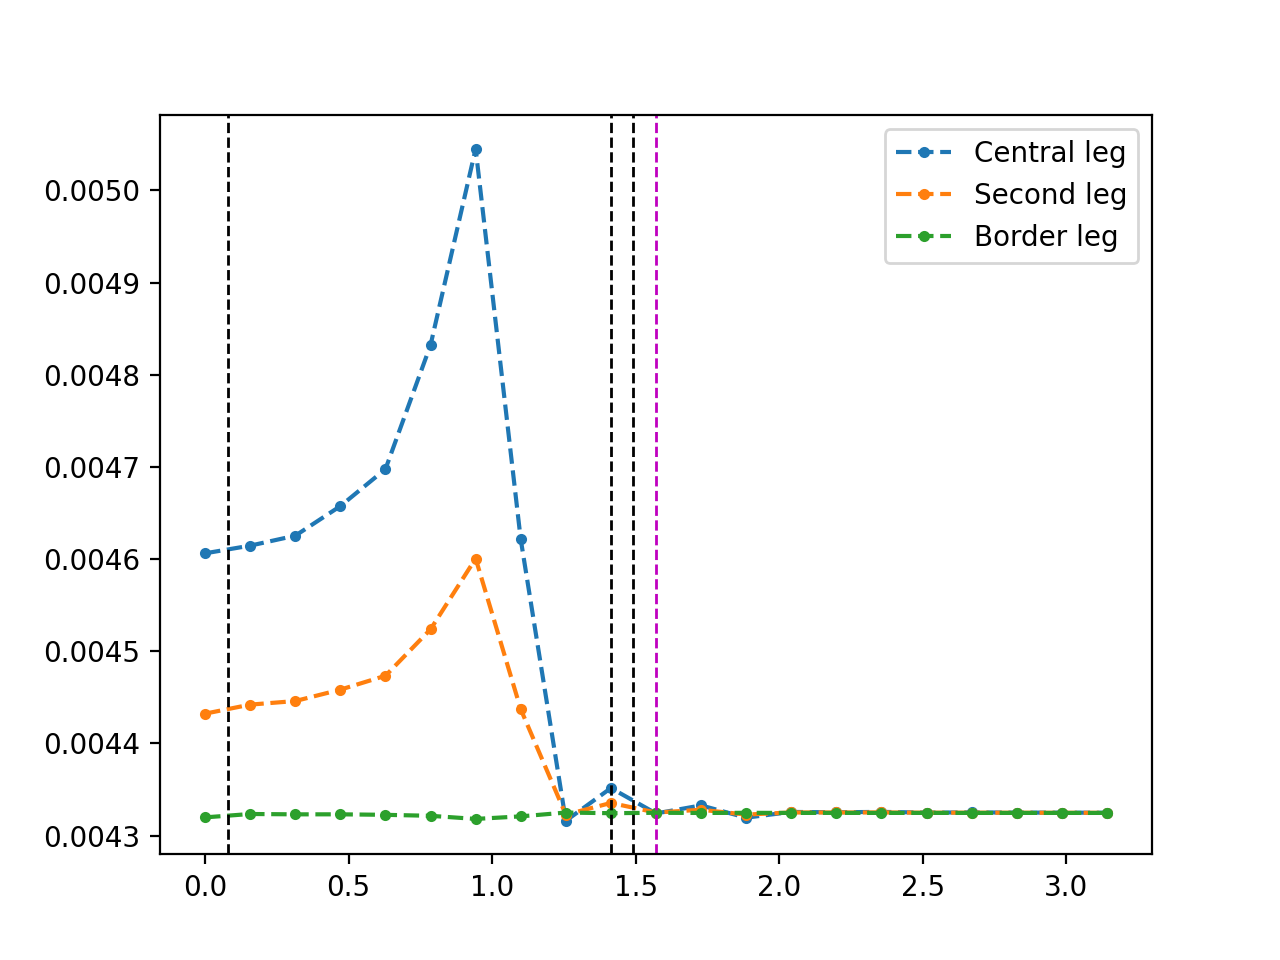

In [96]:
%matplotlib notebook

import matplotlib.pyplot as plt

plt.plot(kx1[::3],skxy[::3], '.--', label ='Central leg')
plt.plot(kx1[1::3],skxy[1::3], '.--', label ='Second leg')
plt.plot(kx1[2::3],skxy[2::3], '.--', label ='Border leg')
plt.legend()

Nup, Ndown = 19, 1
plt.axvline(np.pi * (Nup)/L, ls='--', c='k', lw=1)
plt.axvline(np.pi * (Ndown)/L, ls='--', c='k', lw=1)
plt.axvline(np.pi * (Nup - Ndown)/L, ls='--', c='k', lw=1)
plt.axvline(np.pi * (Nup+Ndown)/L, ls='--', c='m', lw=1)

<IPython.core.display.Javascript object>


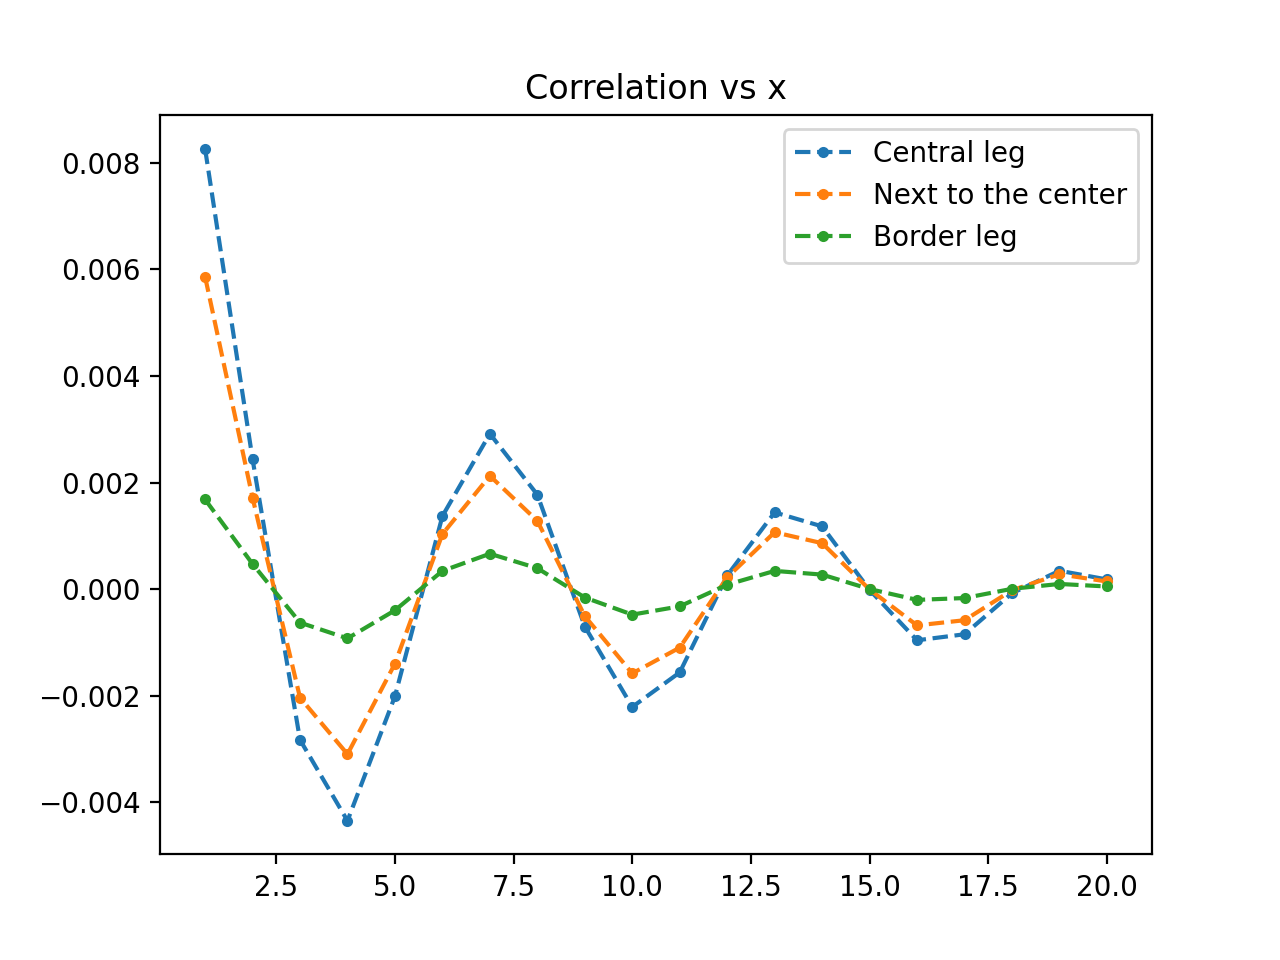

In [97]:
%matplotlib notebook
ctr = 98 # our central site
corr_central = [get(cor, ctr, ctr + i_x*W) for i_x in range(L//2+1)]
corr_second = [get(cor, ctr, ctr+1 + i_x*W) for i_x in range(L//2+1)]
corr_border = [get(cor, ctr, ctr+2 + i_x*W) for i_x in range(L//2+1)]

plt.plot([i+1 for i in range(len(corr_central)-1)],
         np.array(corr_central).ravel()[1:], '.--', label ='Central leg')
plt.plot([i+1 for i in range(len(corr_second)-1)],
         np.array(corr_second).ravel()[1:], '.--', label ='Next to the center')
plt.plot([i+1 for i in range(len(corr_border)-1)],
         np.array(corr_border).ravel()[1:], '.--', label ='Border leg')
# plt.xscale('log')

# # plt.yscale('log')
plt.title('Correlation vs x')
plt.legend()

# W5 Nup = 10, Ndown = 10, BCS

In [98]:
df10_10 = file_to_pd('W5_40_10_10_superconductive.txt')
W, L = 5, 40
ctr = W * (L//2) - W//2

In [99]:
cor = get_all_correlations(df10_10, 98)
fourier2d = get_2d_fourier(cor, 5, 40, 98)

kx1 = [2*np.pi * i[0] / L for i in fourier2d if (i[0] >= 0 and i[1] >= 0)]
ky1 = [2*np.pi * i[1] / W for i in fourier2d if (i[0] >= 0 and i[1] >= 0)]
skxy = [fourier2d[(i[0], i[1])] for i in fourier2d if (i[0] >= 0 and i[1] >= 0)]

# Correlation along central leg vs x

<IPython.core.display.Javascript object>


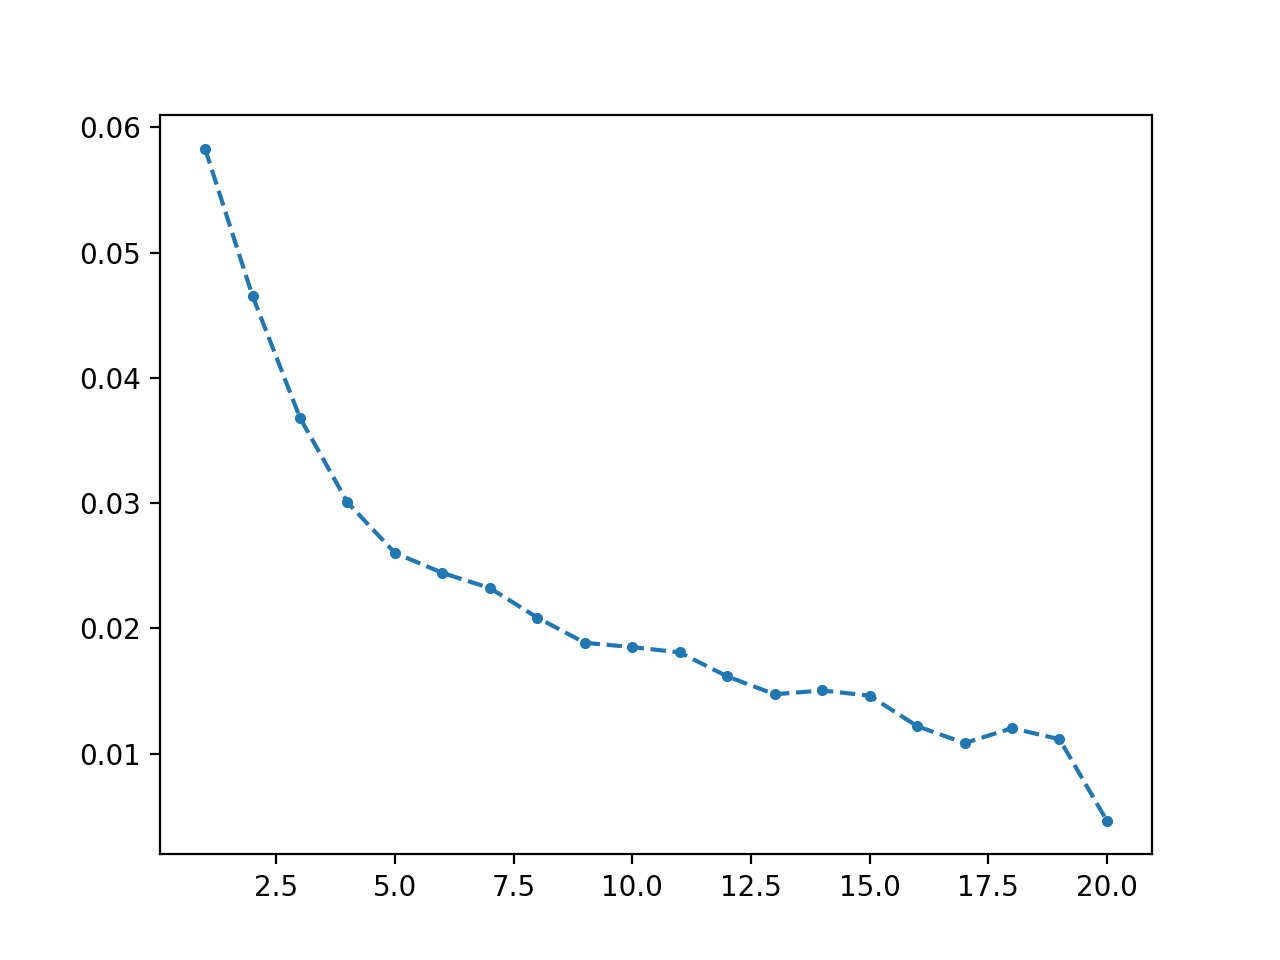

In [100]:
%matplotlib notebook
corr = [get(df10_10, ctr, ctr + i_x*W) for i_x in range(L//2+1)]
plt.plot([i+1 for i in range(len(corr)-1)],
         np.array(corr).ravel()[1:], '.--')
# plt.xscale('log')
# plt.yscale('log')

<IPython.core.display.Javascript object>


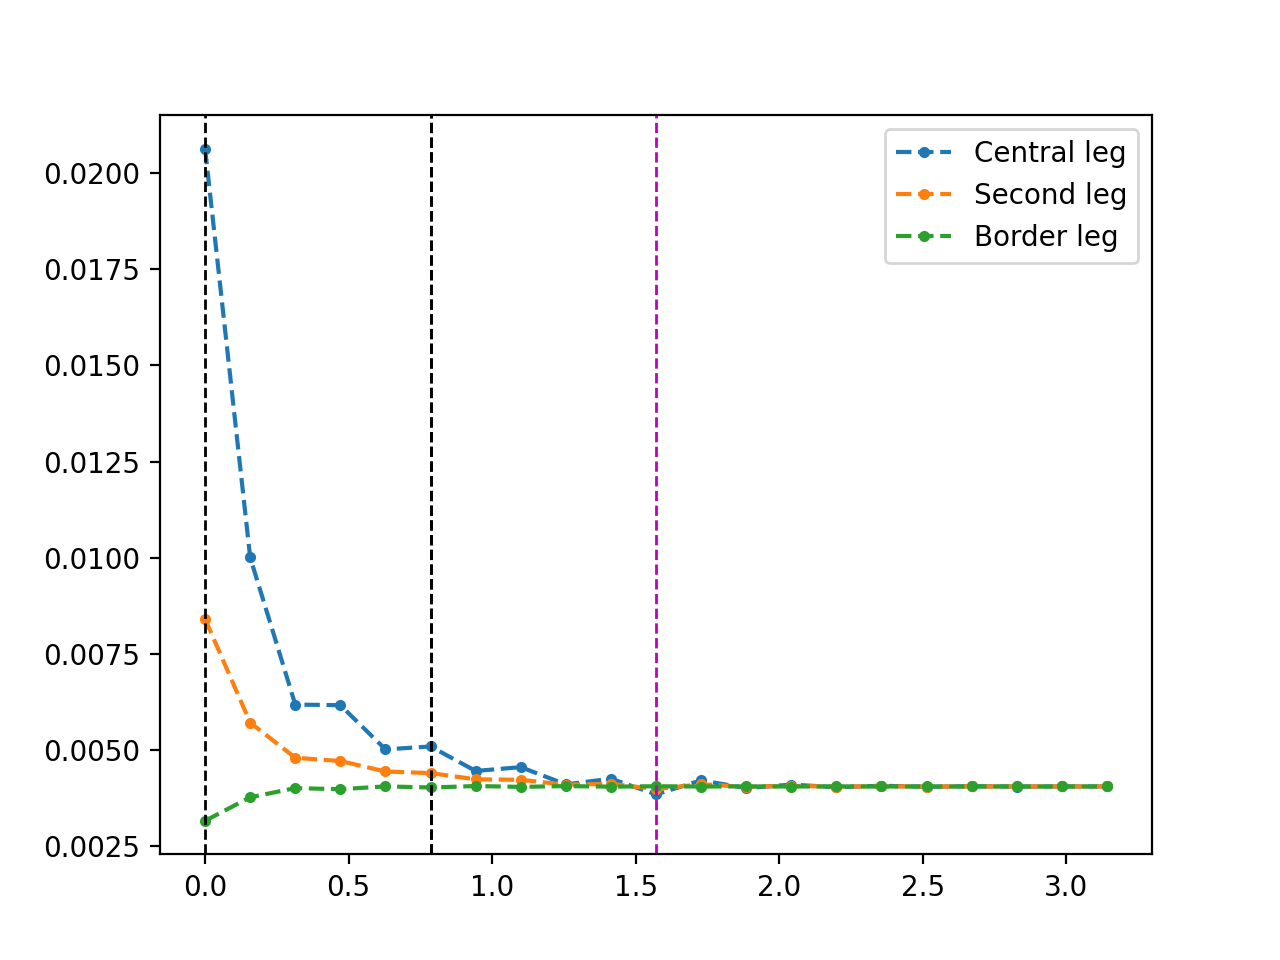

In [101]:
%matplotlib notebook

import matplotlib.pyplot as plt

plt.plot(kx1[::3],skxy[::3], '.--', label ='Central leg')
plt.plot(kx1[1::3],skxy[1::3], '.--', label ='Second leg')
plt.plot(kx1[2::3],skxy[2::3], '.--', label ='Border leg')
plt.legend()

Nup, Ndown = 10, 10
plt.axvline(np.pi * (Nup)/L, ls='--', c='k', lw=1)
plt.axvline(np.pi * (Ndown)/L, ls='--', c='k', lw=1)
plt.axvline(np.pi * (Nup - Ndown)/L, ls='--', c='k', lw=1)
plt.axvline(np.pi * (Nup+Ndown)/L, ls='--', c='m', lw=1)

# W5 Nup = 13, Ndown = 7

# W5 Nup = 15, Ndown = 5

# W5 Nup = 17, Ndown = 3

# W5 Nup = 18, Ndown = 2

# W5 Nup = 19, Ndown = 1



In [102]:
W, L = 5, 40
ctr = W * (L//2) - W//2

In [103]:
df13_7 = file_to_pd('W5_40_13_7_superconductive.txt')
df15_5 = file_to_pd('W5_40_15_5_superconductive.txt')
df17_3 = file_to_pd('W5_40_17_3superconductive.txt')
df18_2 = file_to_pd('W5_40_18_2_superconductive.txt')
df19_1 = file_to_pd('W5_40_19_1_superconductive.txt')
df10_10 = file_to_pd('W5_40_10_10_superconductive.txt')

In [ ]:
10,13,15,17,18,19

<IPython.core.display.Javascript object>


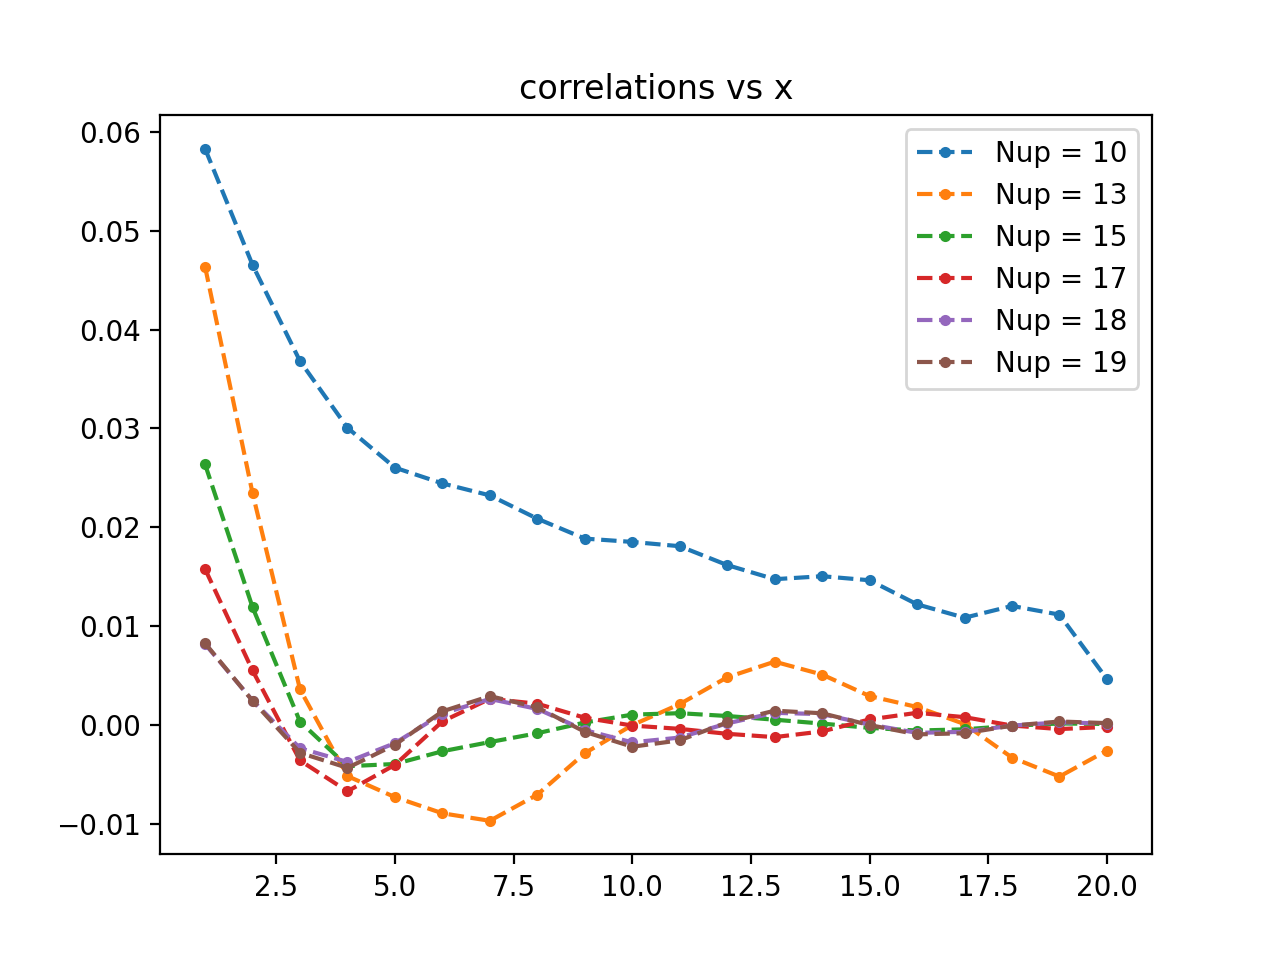

In [105]:
corr13 = [get(df13_7, ctr, ctr + i_x*W) for i_x in range(L//2+1)]
corr15 = [get(df15_5, ctr, ctr + i_x*W) for i_x in range(L//2+1)]
corr17 = [get(df17_3, ctr, ctr + i_x*W) for i_x in range(L//2+1)]
corr18 = [get(df18_2, ctr, ctr + i_x*W) for i_x in range(L//2+1)]
corr19 = [get(df19_1, ctr, ctr + i_x*W) for i_x in range(L//2+1)]
corr10 = [get(df10_10, ctr, ctr + i_x*W) for i_x in range(L//2+1)]


%matplotlib notebook
plt.plot([i+1 for i in range(len(corr10)-1)],
         np.array(corr10).ravel()[1:], '.--', label ='Nup = 10')
plt.plot([i+1 for i in range(len(corr13)-1)],
         np.array(corr13).ravel()[1:], '.--', label ='Nup = 13')
plt.plot([i+1 for i in range(len(corr15)-1)],
         np.array(corr15).ravel()[1:], '.--', label ='Nup = 15')
plt.plot([i+1 for i in range(len(corr17)-1)],
         np.array(corr17).ravel()[1:], '.--', label ='Nup = 17')
plt.plot([i+1 for i in range(len(corr18)-1)],
         np.array(corr18).ravel()[1:], '.--', label ='Nup = 18')
plt.plot([i+1 for i in range(len(corr19)-1)],
         np.array(corr19).ravel()[1:], '.--', label ='Nup = 19')
# plt.xscale('log')

# # plt.yscale('log')
plt.title('correlations vs x')
plt.legend()

In [107]:
def get_kx_ky_skxy(df, ctr):
    cor = get_all_correlations(df, ctr)
    fourier2d = get_2d_fourier(cor, 5, 40, ctr)

    kx1 = [2*np.pi * i[0] / L for i in fourier2d if (i[0] >= 0 and i[1] >= 0)]
    ky1 = [2*np.pi * i[1] / W for i in fourier2d if (i[0] >= 0 and i[1] >= 0)]
    skxy = [fourier2d[(i[0], i[1])] for i in fourier2d if (i[0] >= 0 and i[1] >= 0)]
    return kx1, ky1, skxy

In [108]:
ctr = 98

kx10, _, skx10 = get_kx_ky_skxy(df10_10, ctr)

kx13, _, skx13 = get_kx_ky_skxy(df13_7, ctr)

kx15, _, skx15 = get_kx_ky_skxy(df15_5, ctr)

kx17, _, skx17 = get_kx_ky_skxy(df17_3, ctr)

kx18, _, skx18 = get_kx_ky_skxy(df18_2, ctr)

kx19, _, skx19 = get_kx_ky_skxy(df19_1, ctr)

<IPython.core.display.Javascript object>


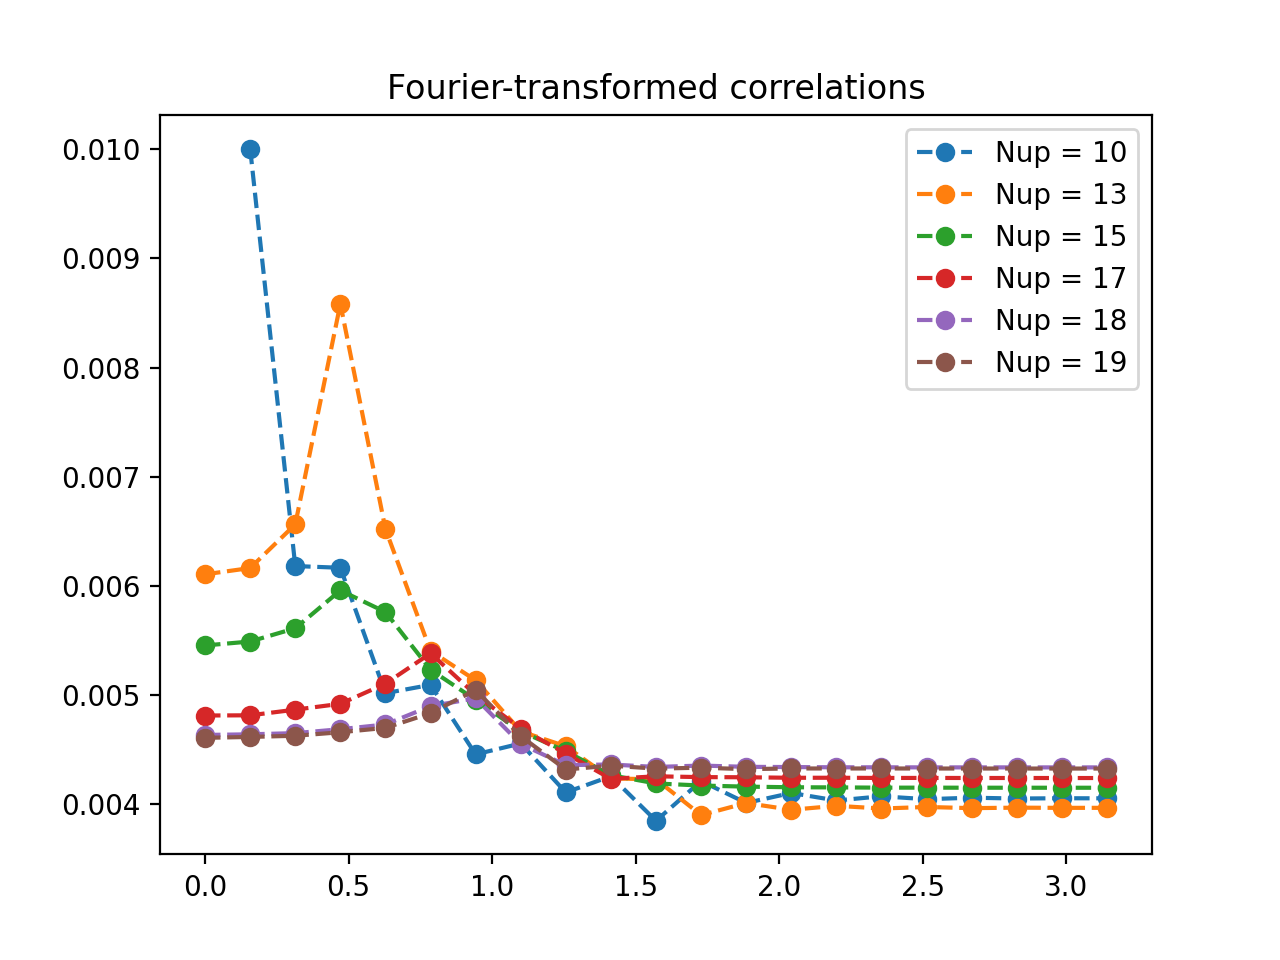

In [113]:
%matplotlib notebook

# import matplotlib.pyplot as plt
plt.plot(kx10[3::3], skx10[3::3], 'o--', label = 'Nup = 10') #I've thrown away the first value for 10,10
                                                         # because it's too large
plt.plot(kx13[::3], skx13[::3], 'o--', label = 'Nup = 13')
plt.plot(kx15[::3], skx15[::3], 'o--', label = 'Nup = 15')
plt.plot(kx17[::3], skx17[::3], 'o--', label = 'Nup = 17')
plt.plot(kx18[::3], skx18[::3], 'o--', label = 'Nup = 18')
plt.plot(kx19[::3], skx19[::3], 'o--', label = 'Nup = 19')
plt.title('Fourier-transformed correlations')
plt.legend()
# plt.axvline(np.pi * (Nup)/L, ls='--', c='g', lw=1)
# plt.axvline(np.pi * (Ndown)/L, ls='--', c='y', lw=1)
# plt.axvline(np.pi * (Nup - Ndown)/L, ls='--', c='k', lw=1)
# plt.axvline(np.pi * (Nup+Ndown)/L, ls='--', c='m', lw=1)

# !pip install lmfit

added graph of peak coordinate vs Sz https://arxiv.org/pdf/0707.4172.pdf

<IPython.core.display.Javascript object>


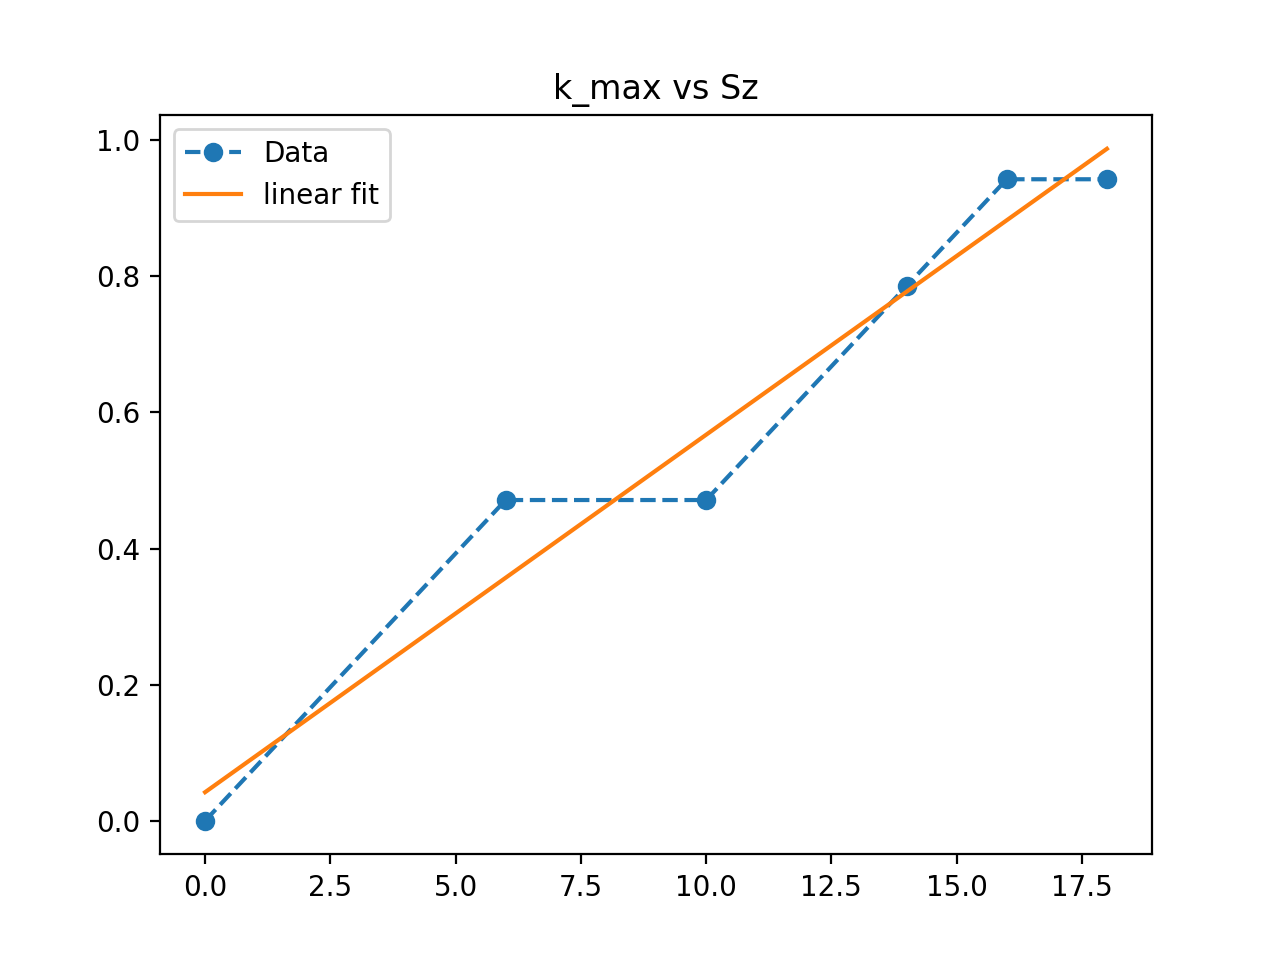

In [114]:
%matplotlib notebook

from lmfit.models import ExpressionModel

def get_peak(k, s):
    return k[:][np.array(s[:]).ravel().argmax()]

kmax = [get_peak(kx10[::3], skx10[::3]),
        get_peak(kx13[::3], skx13[::3]),
        get_peak(kx15[::3], skx15[::3]),
        get_peak(kx17[::3], skx17[::3]),
        get_peak(kx18[::3], skx18[::3]),
        get_peak(kx19[::3], skx19[::3])]
sz = [0, 6, 10, 14, 16, 18]

mod_kmax = ExpressionModel('a*x+b')

mod_kmax.set_param_hint("a", value=1.0, vary=True)
mod_kmax.set_param_hint("b", value=1.0, vary=True)
params_kmax = mod_kmax.make_params()

result_kmax = mod_kmax.fit(kmax, 
                           params_kmax, 
                           method="leastsq", 
                           x=sz)  # fitting


plt.title('k_max vs Sz')
plt.plot(sz, kmax, 'o--', label = 'Data')
plt.plot(sz, result_kmax.best_fit, '-', label = 'linear fit')
plt.legend()